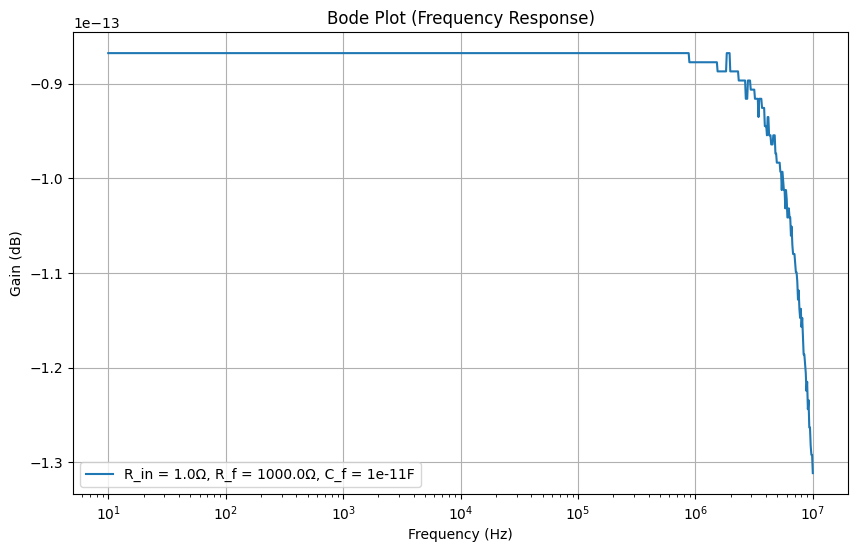

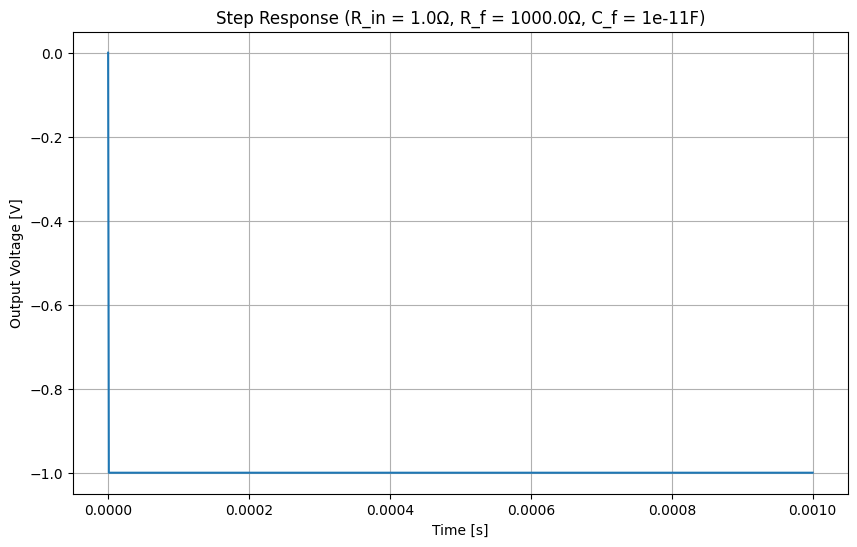

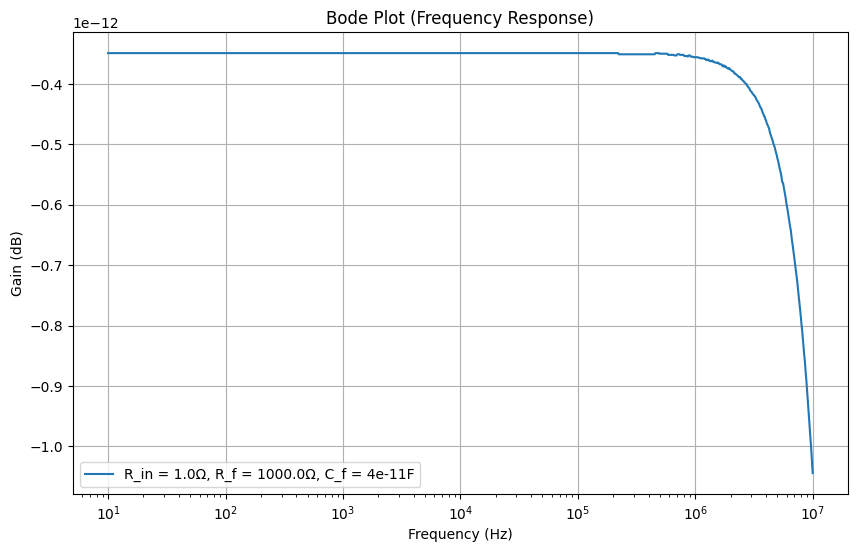

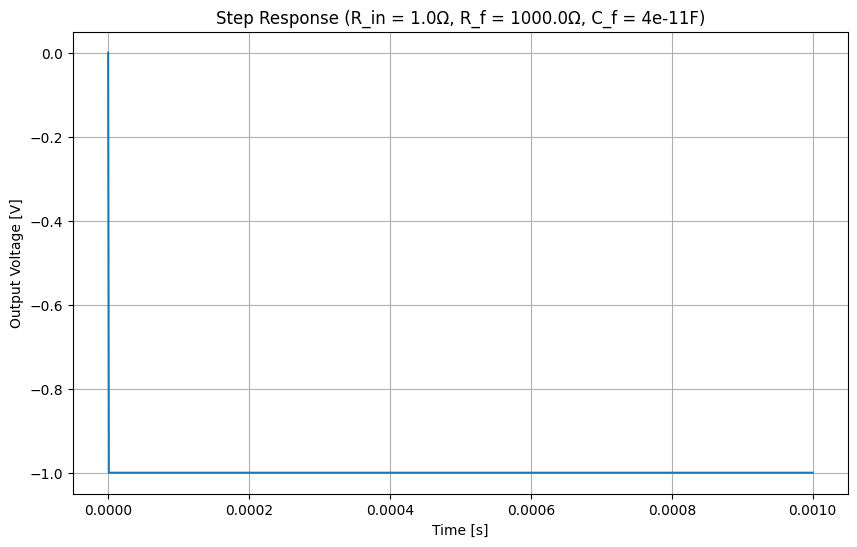

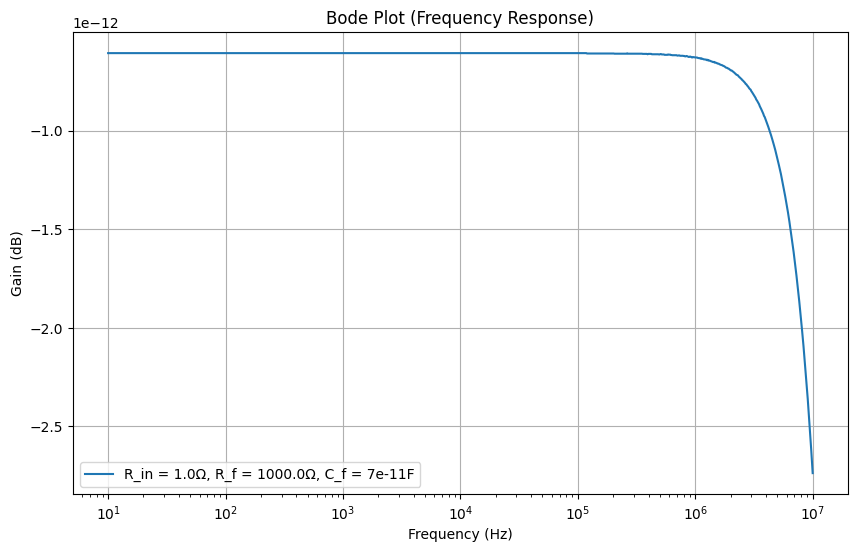

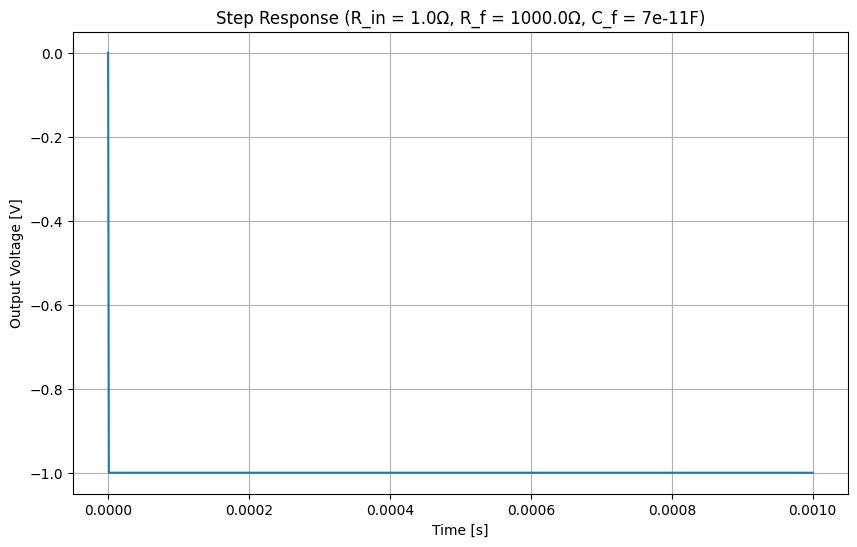

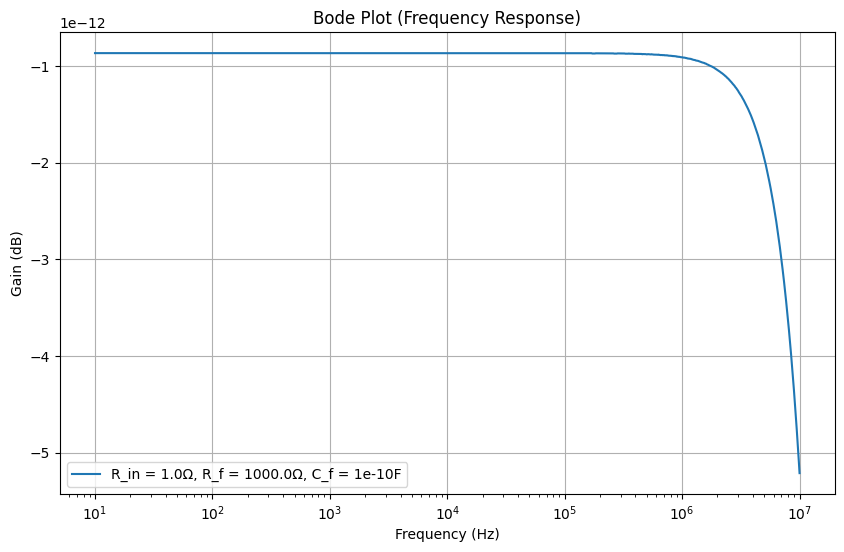

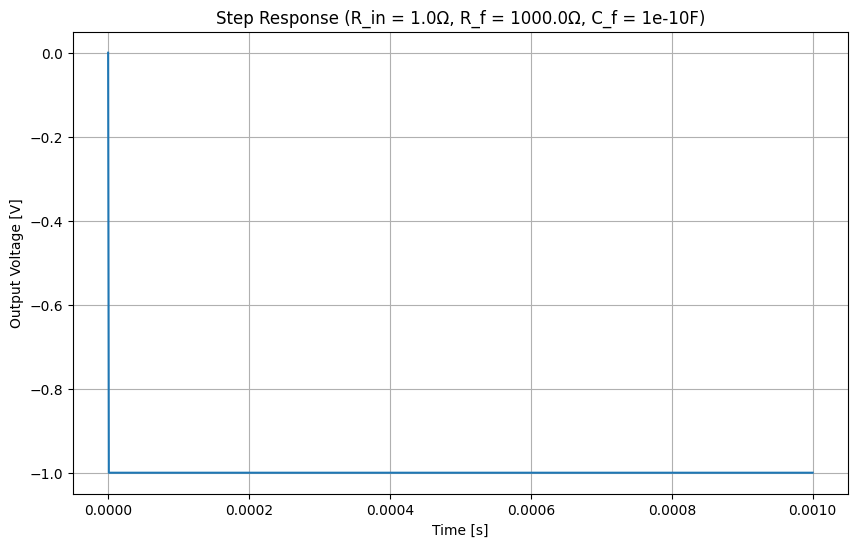

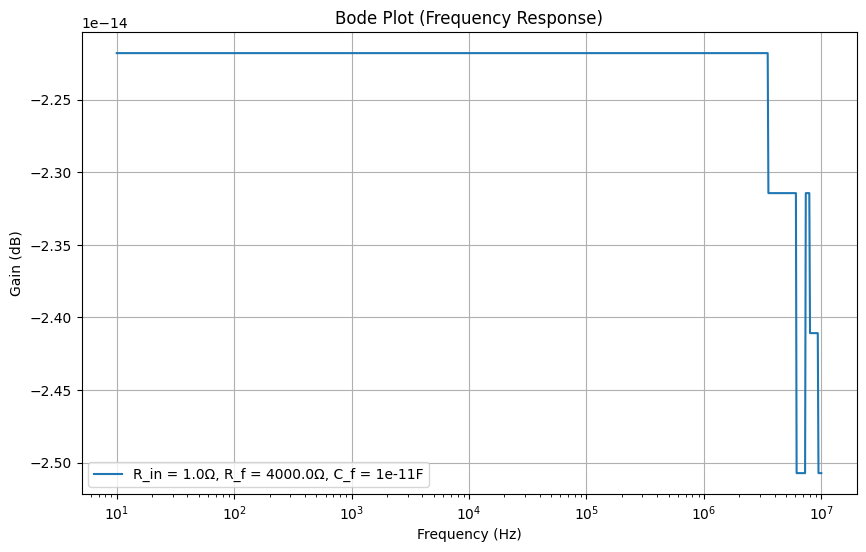

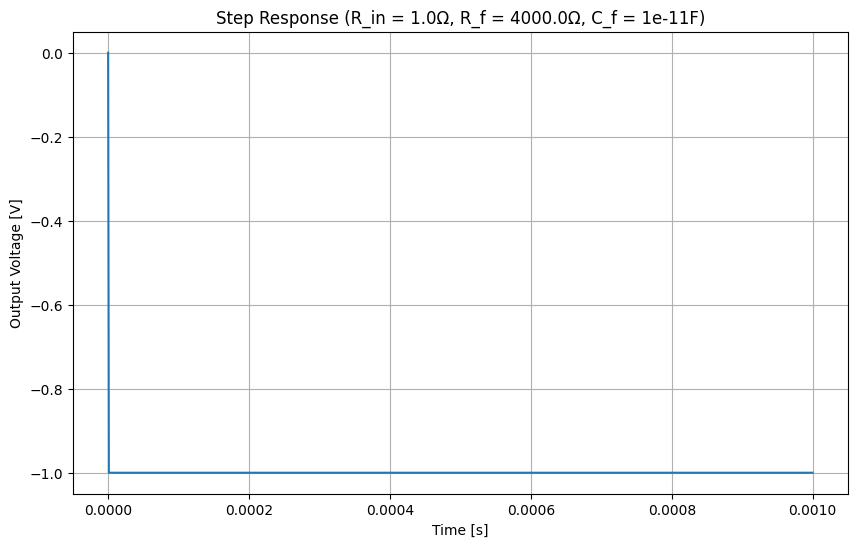

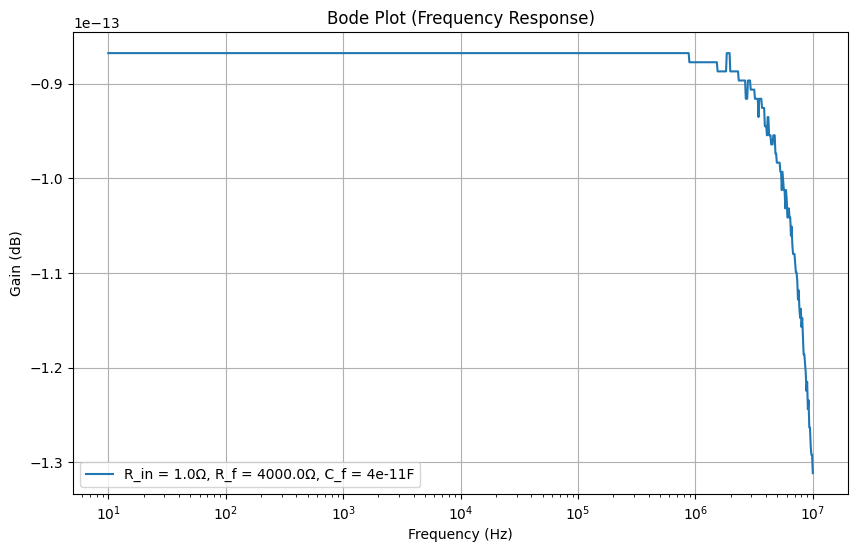

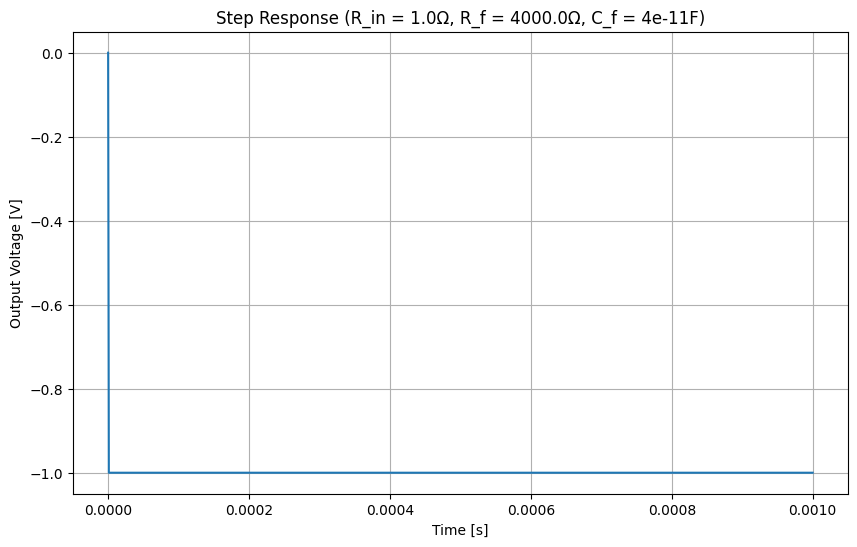

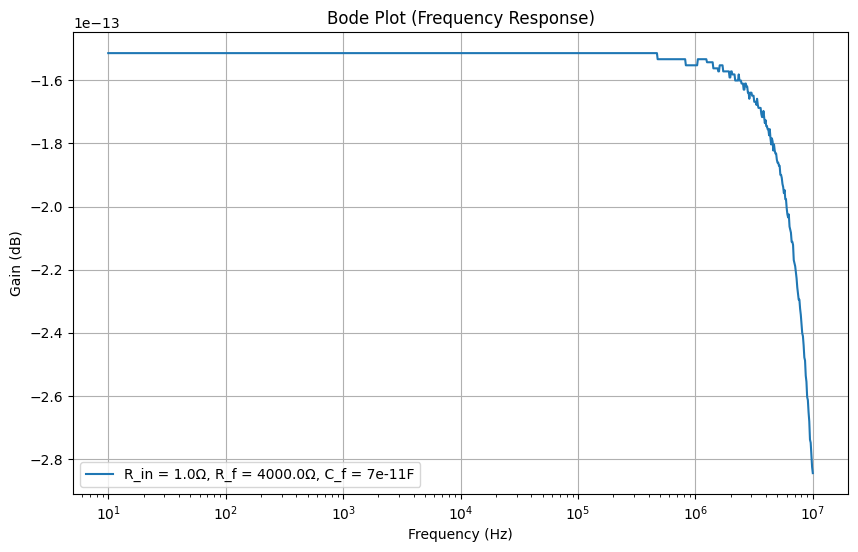

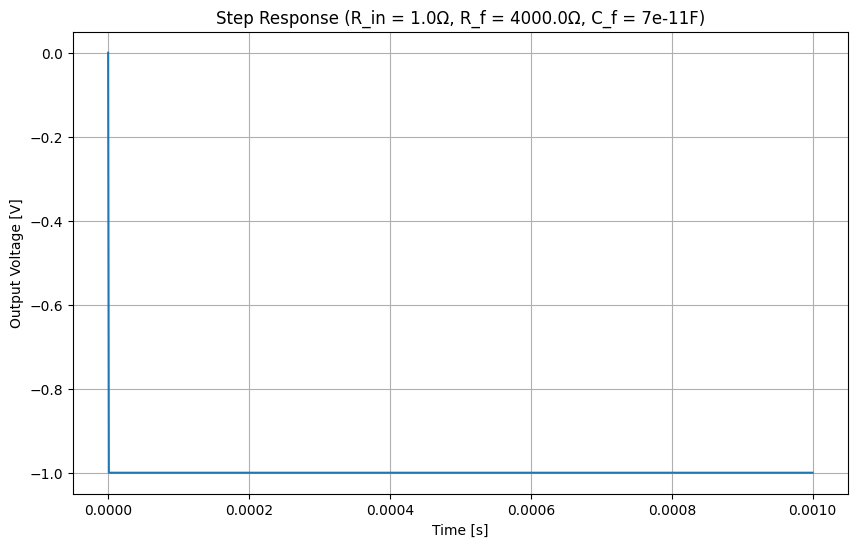

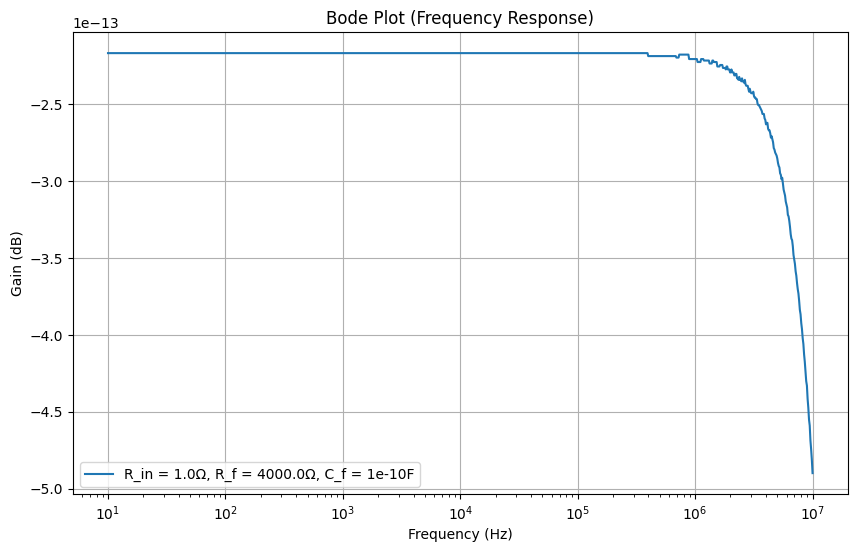

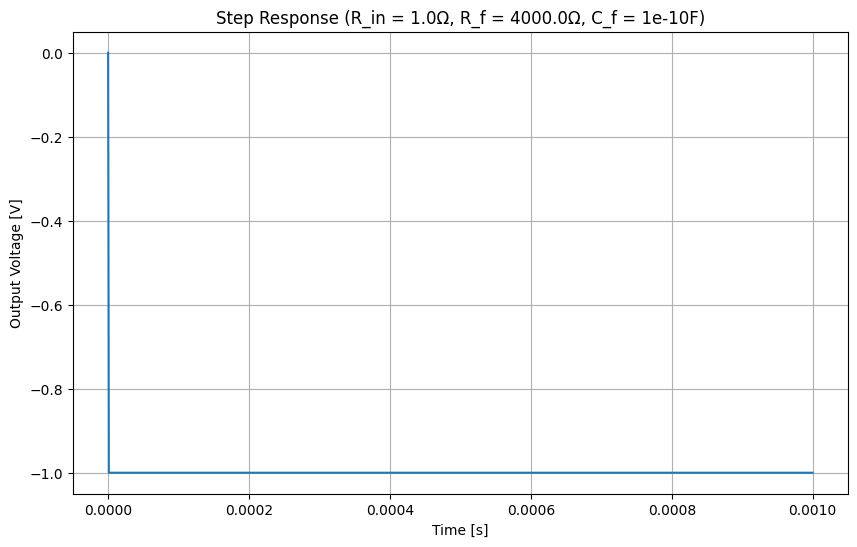

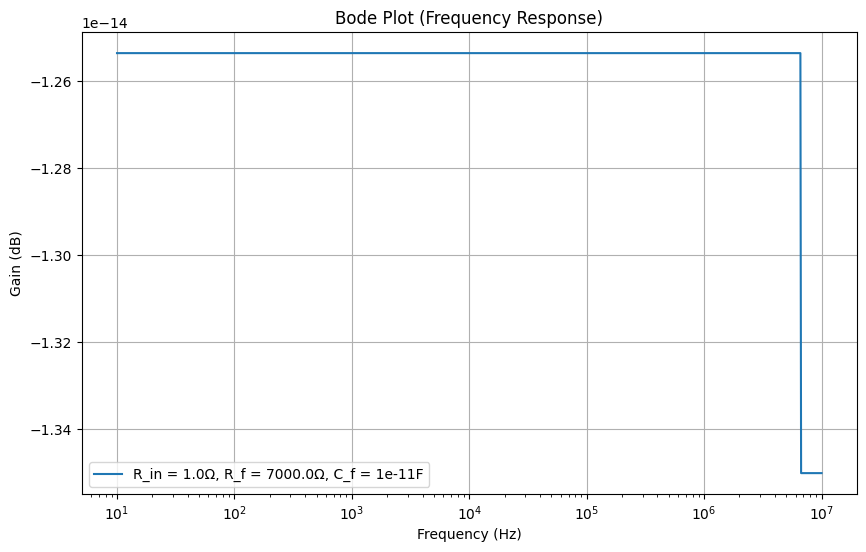

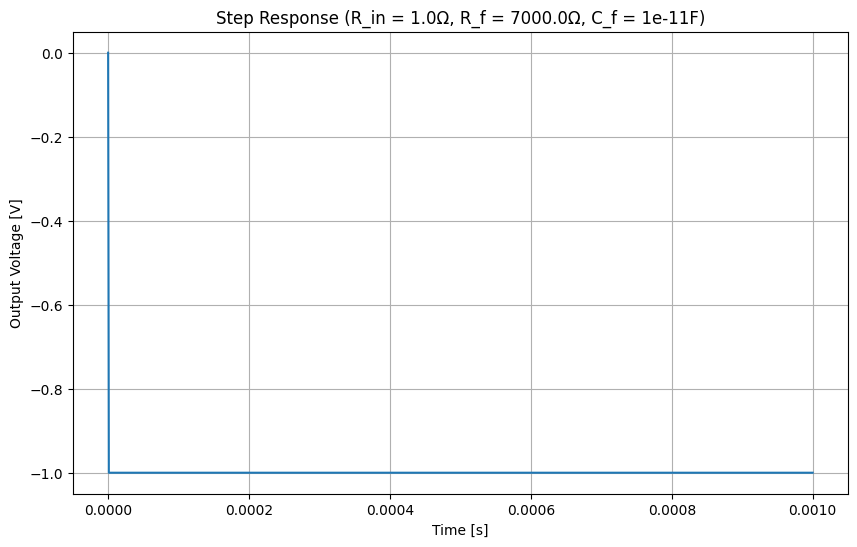

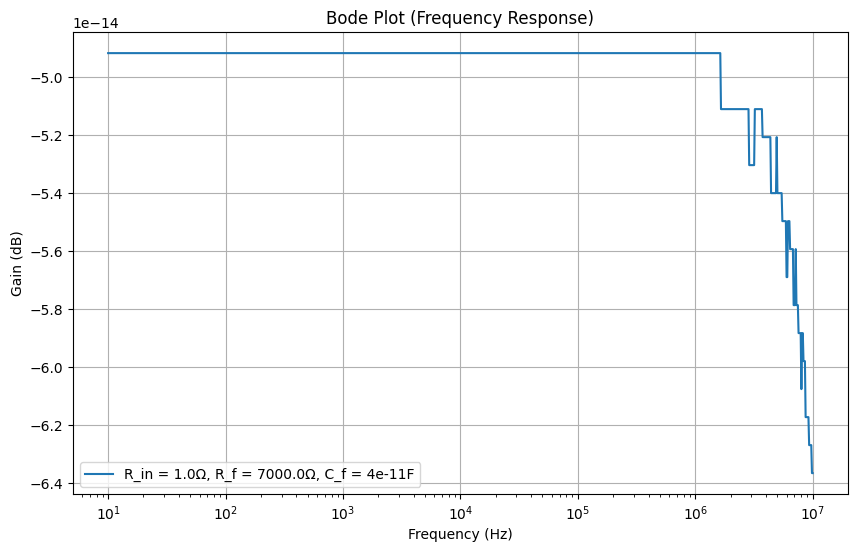

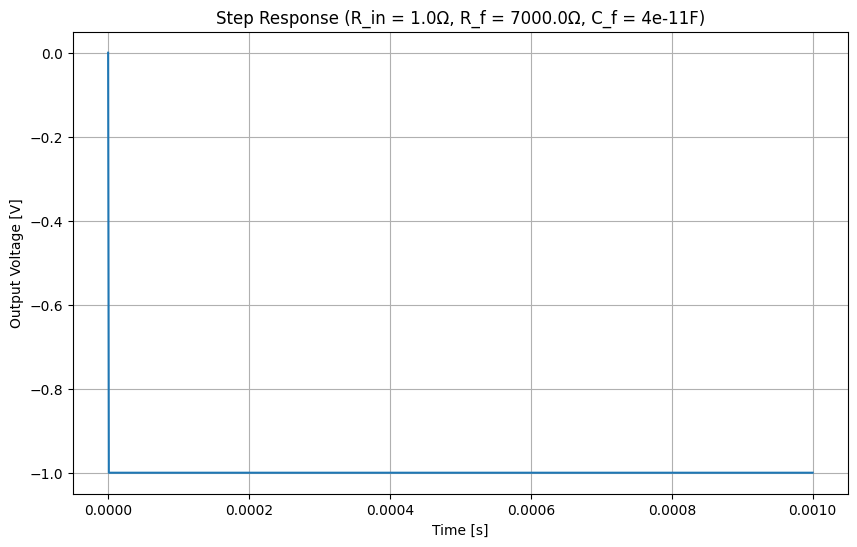

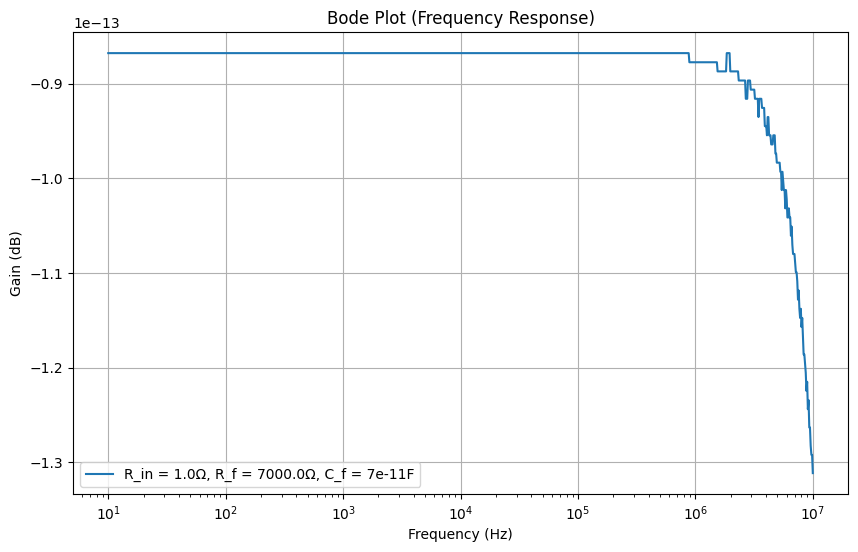

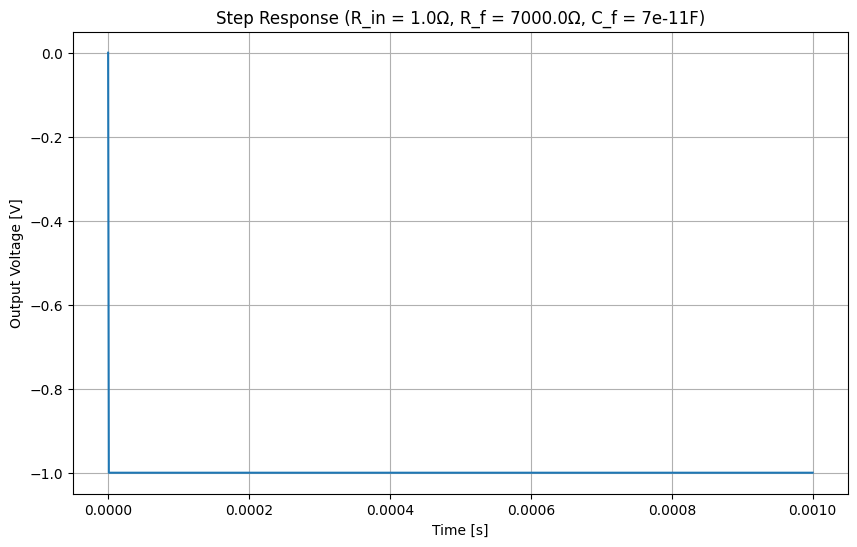

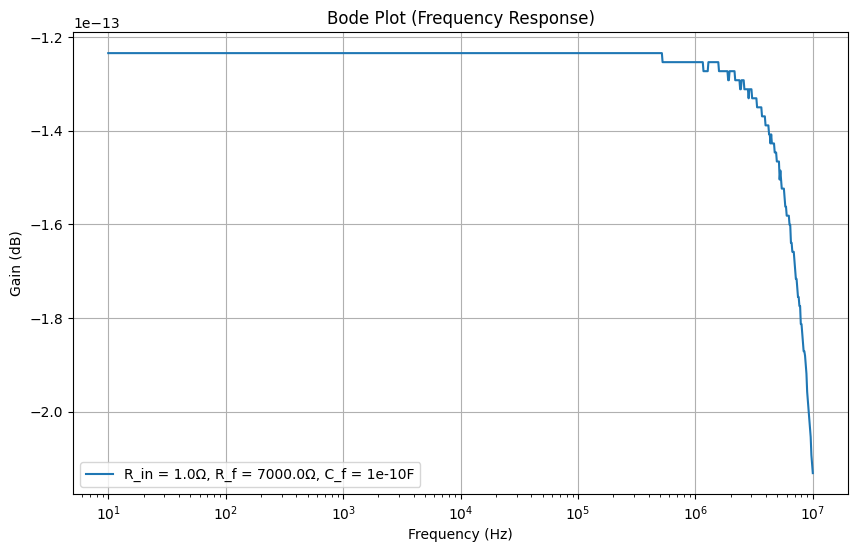

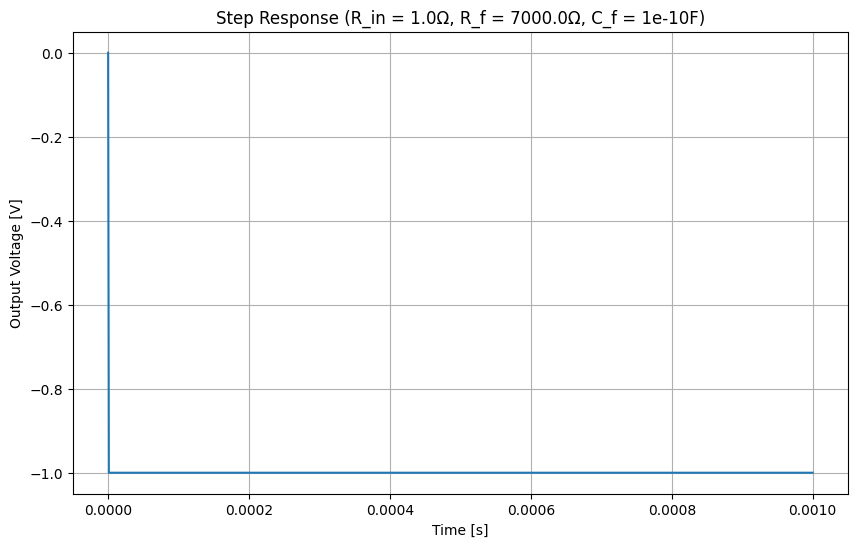

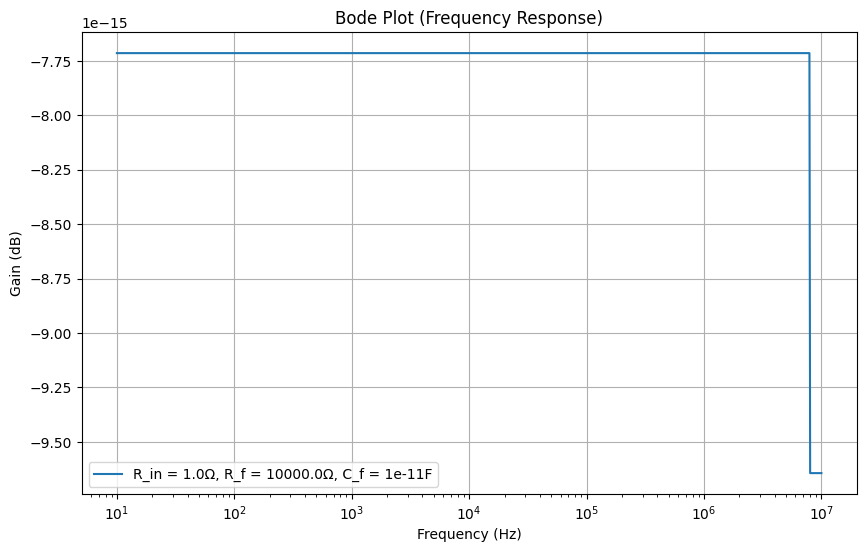

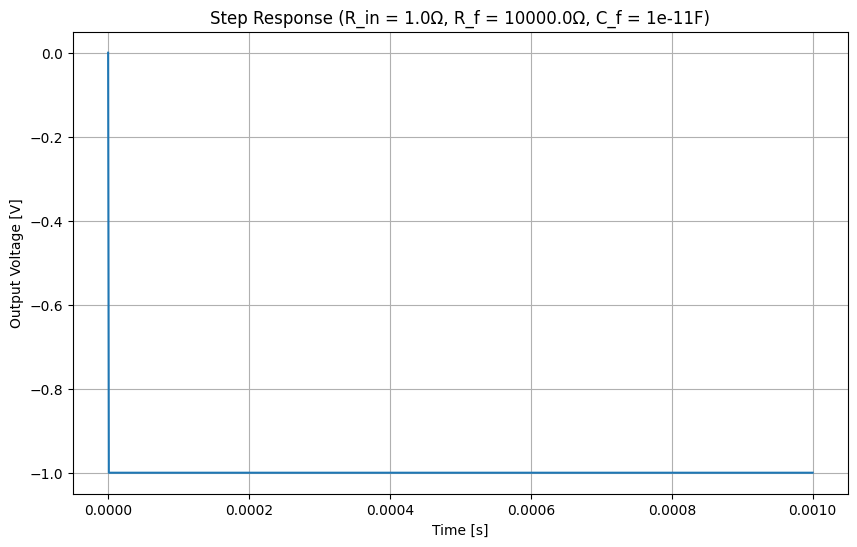

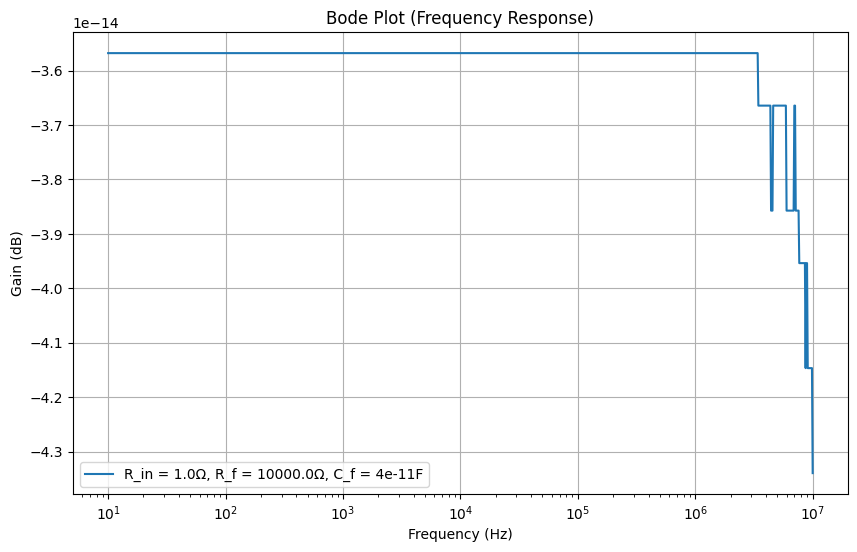

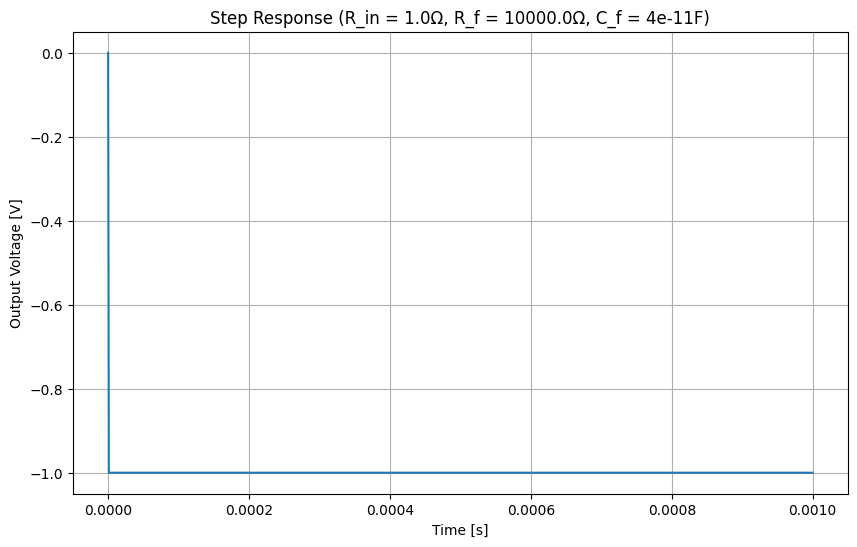

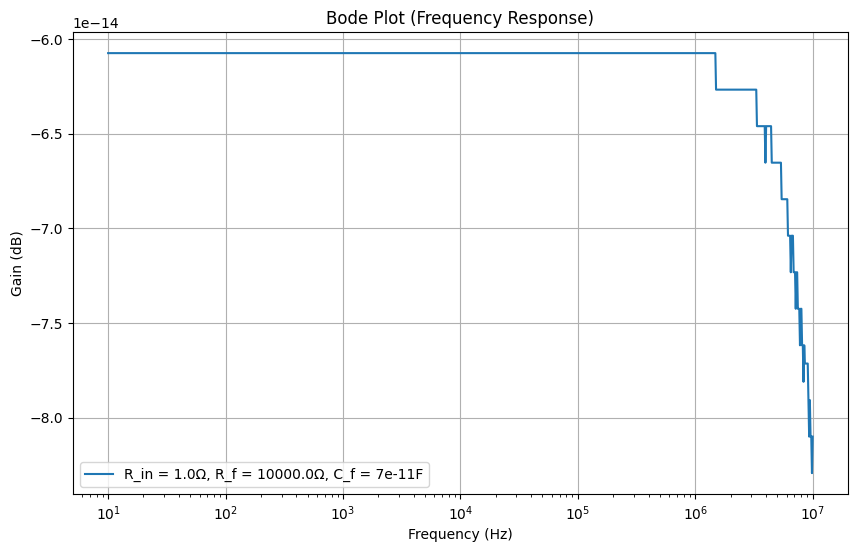

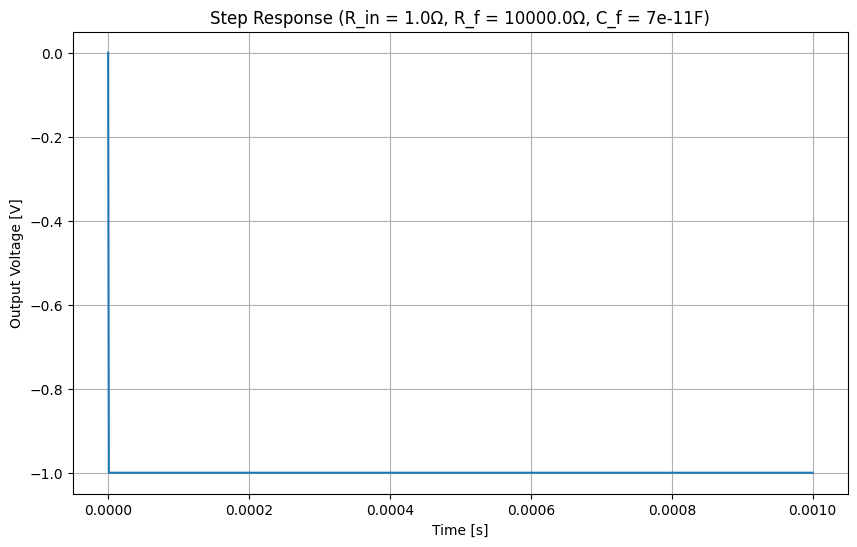

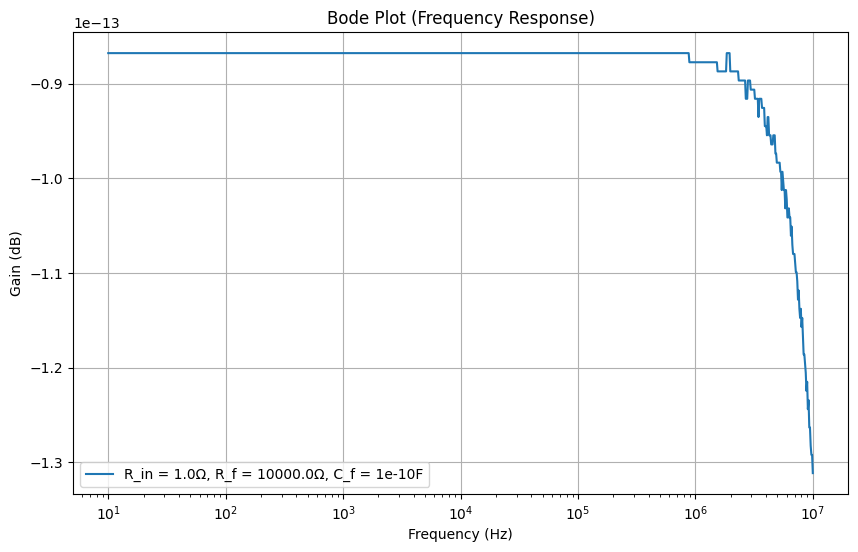

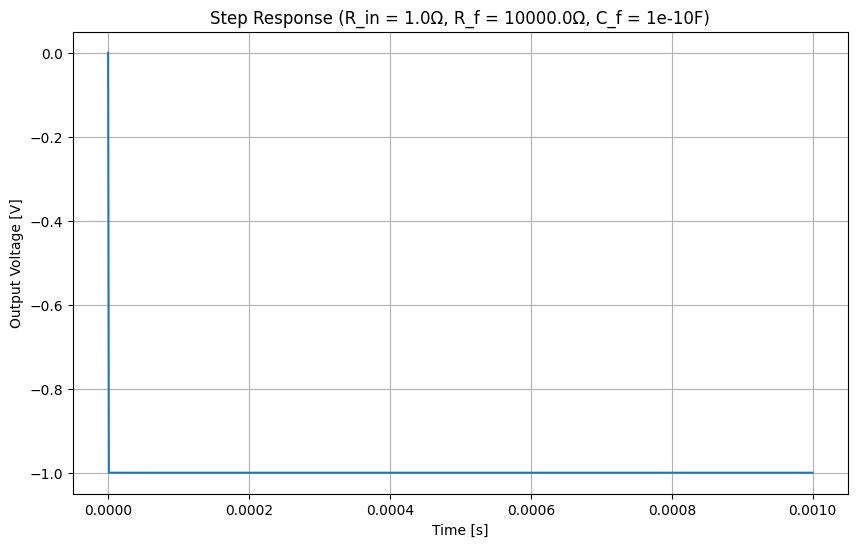

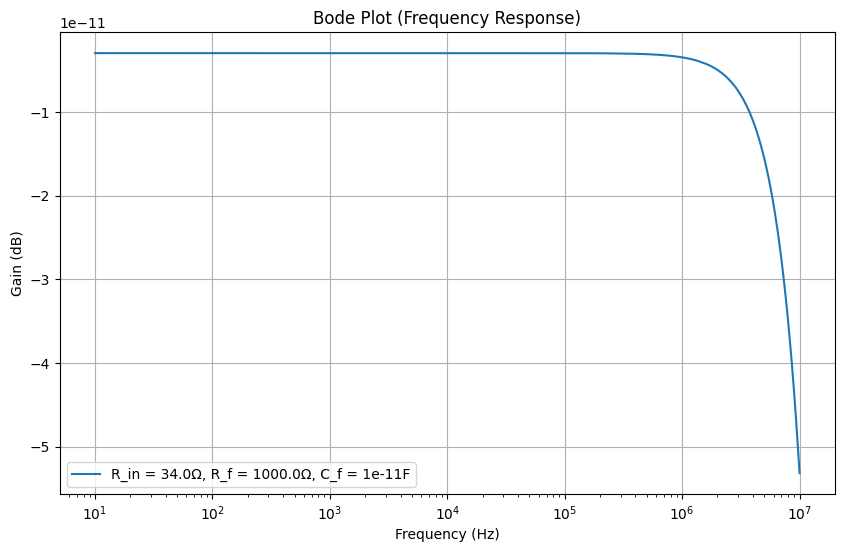

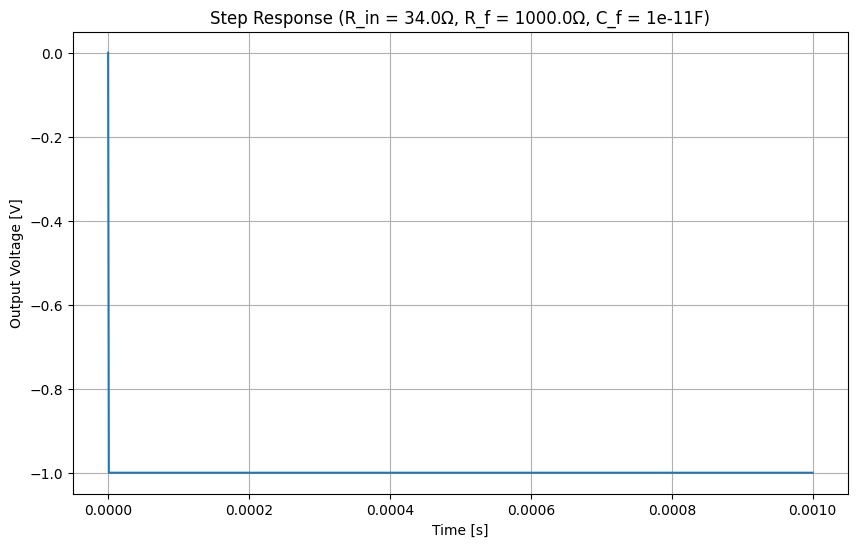

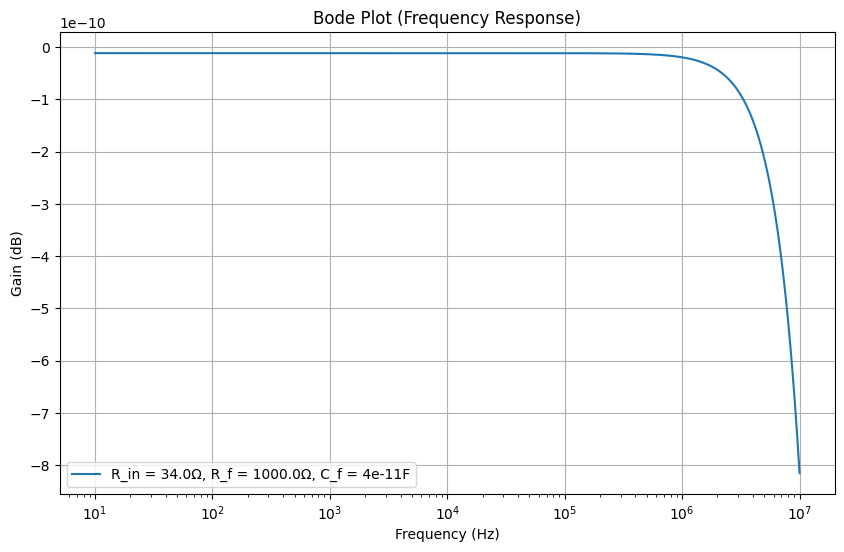

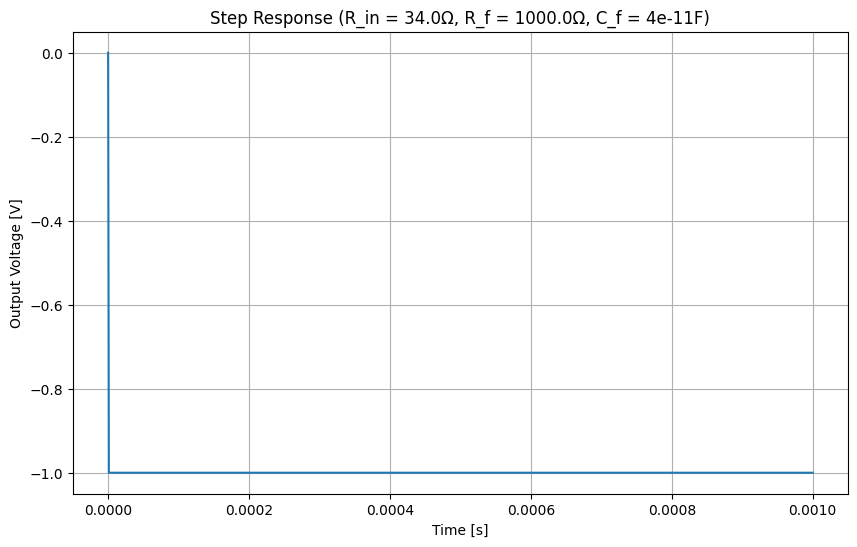

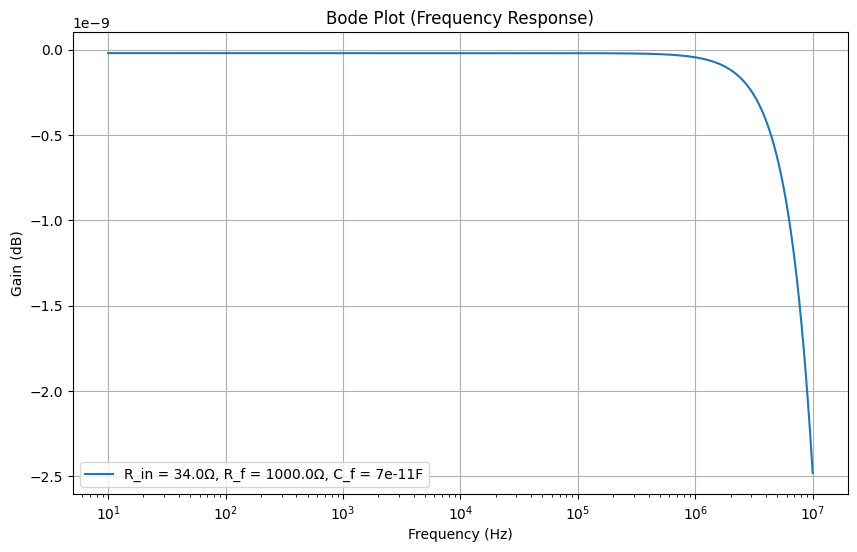

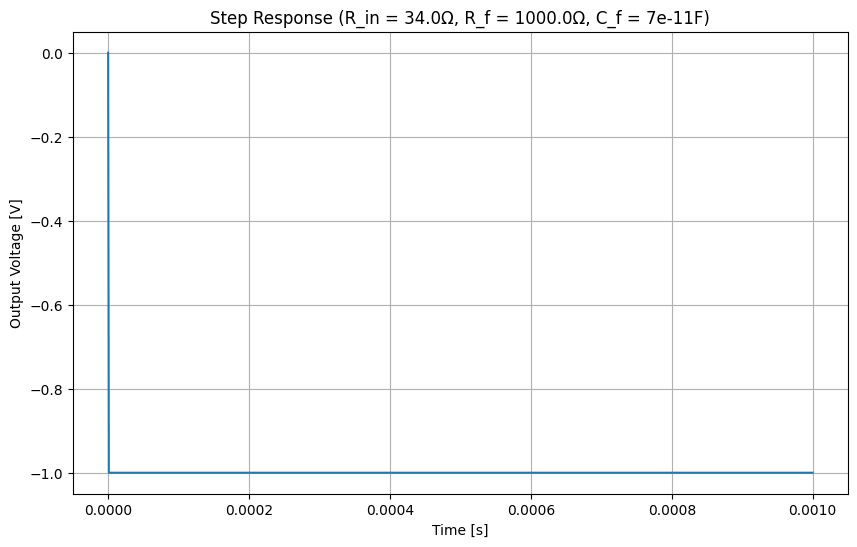

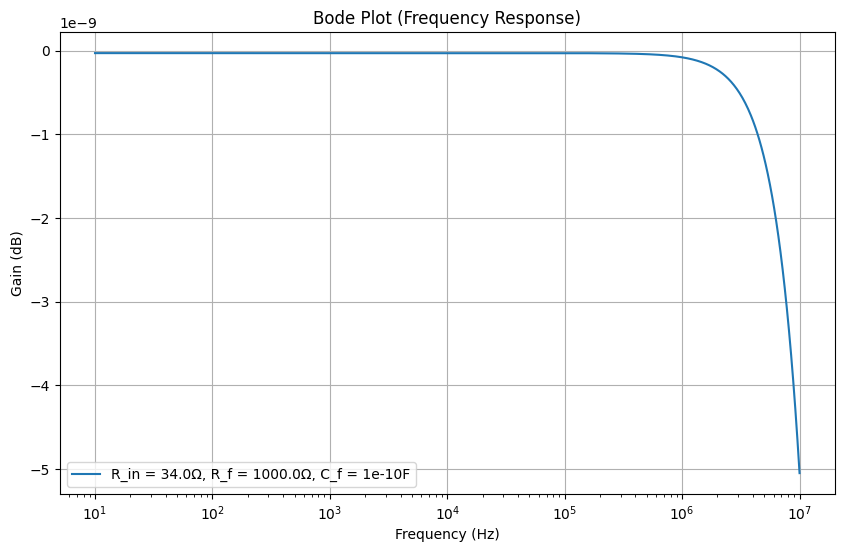

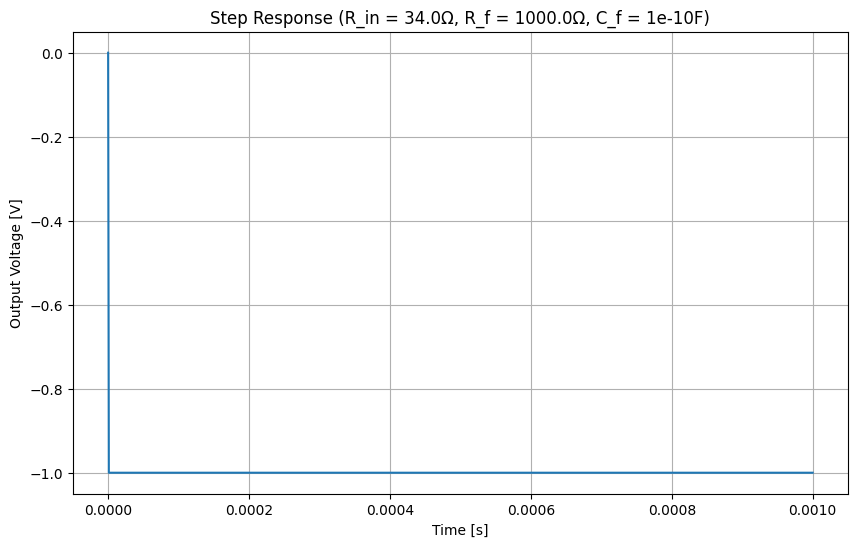

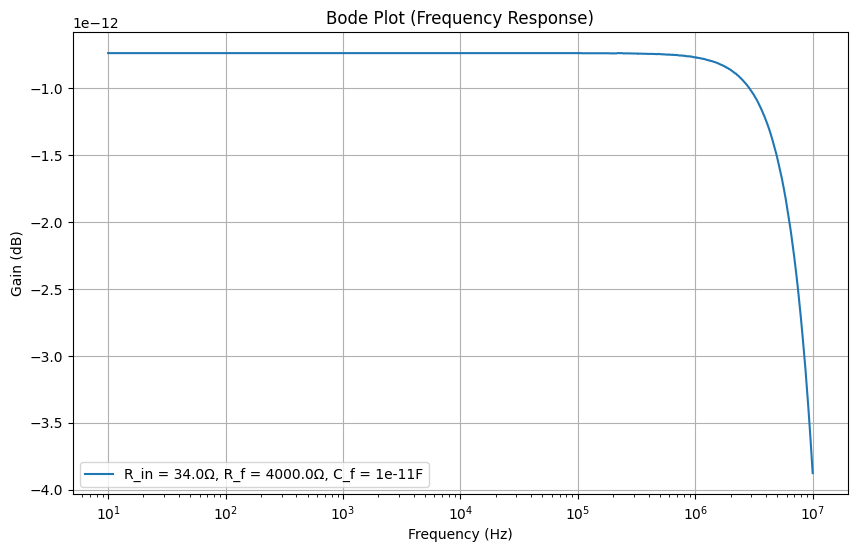

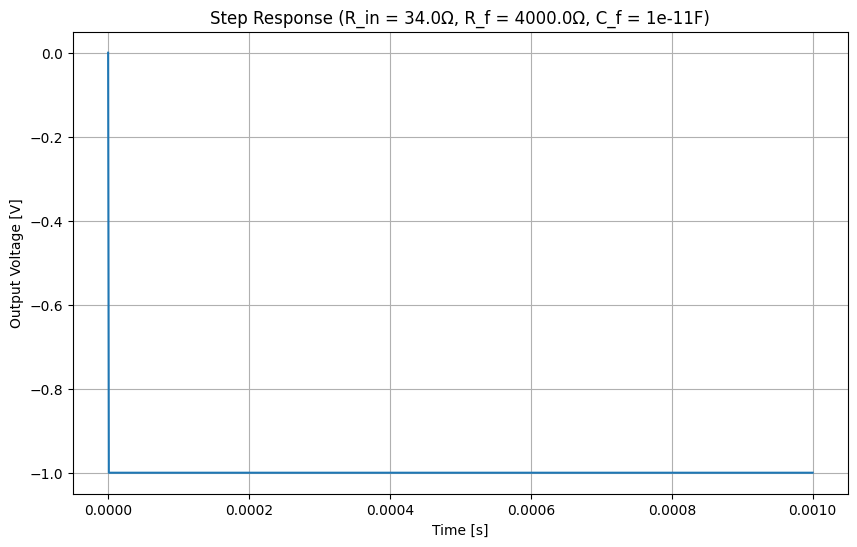

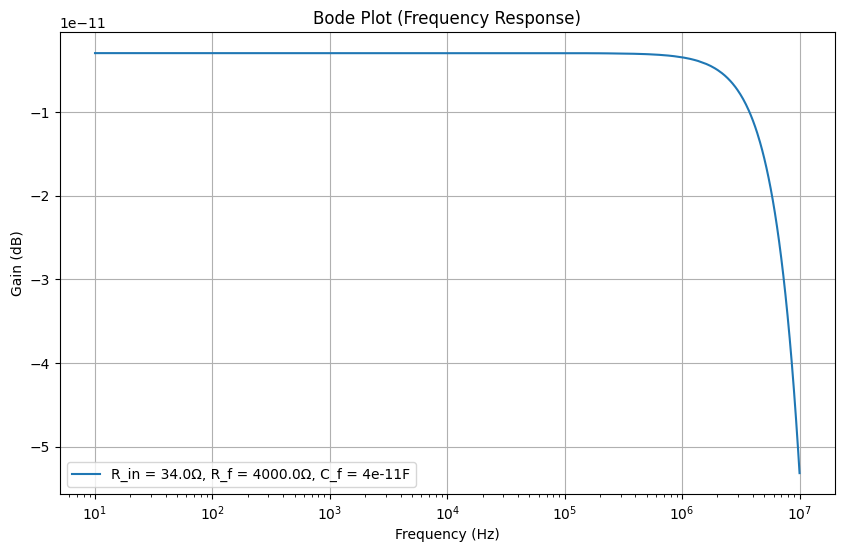

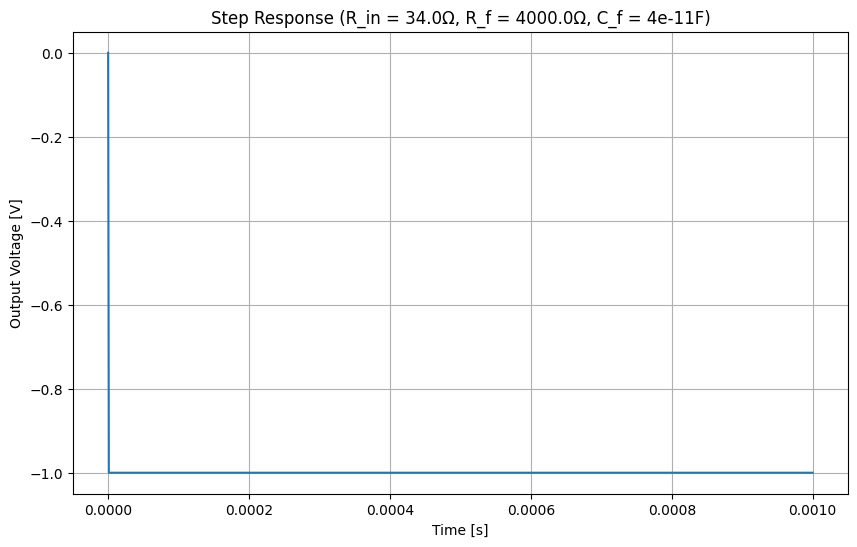

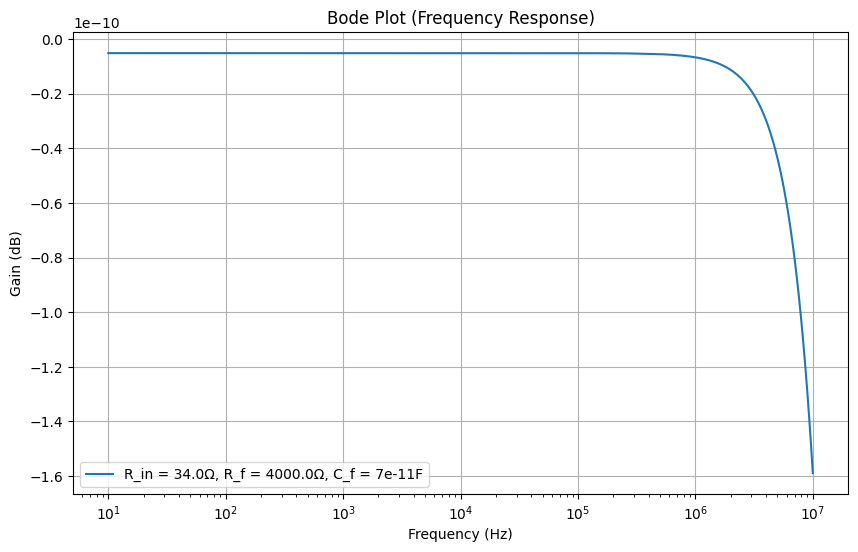

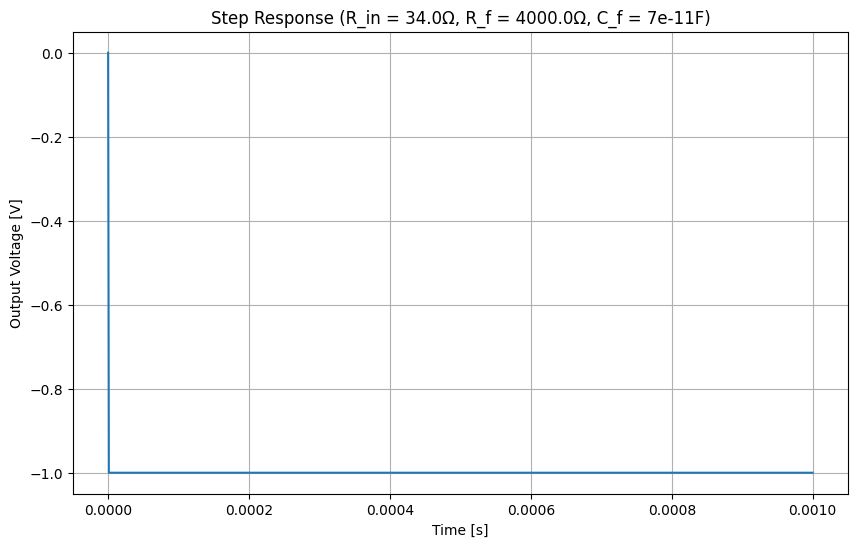

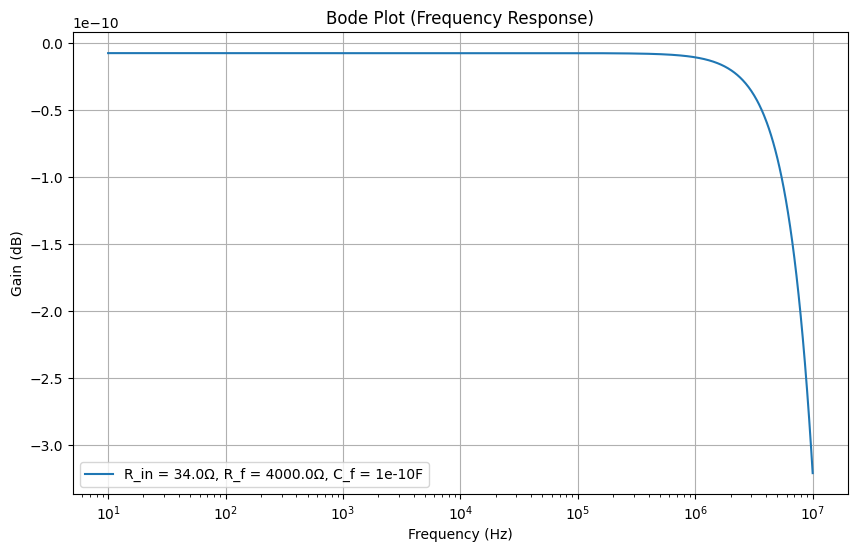

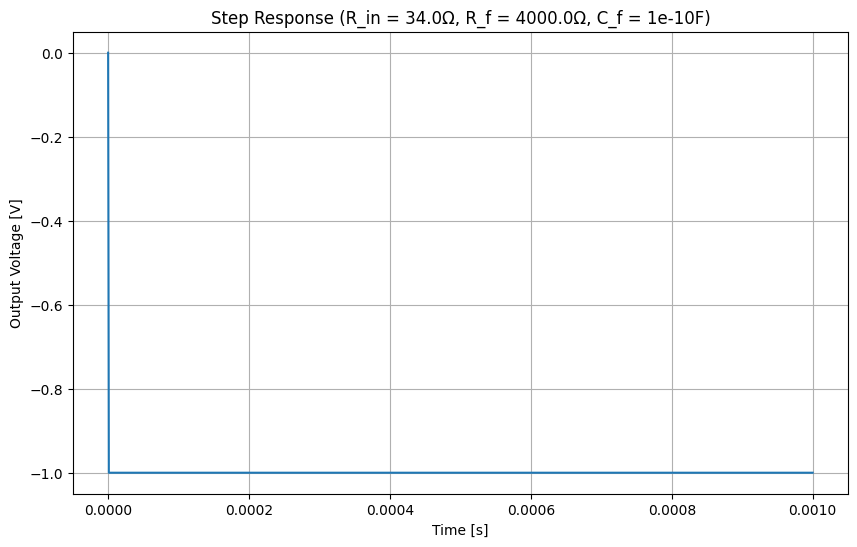

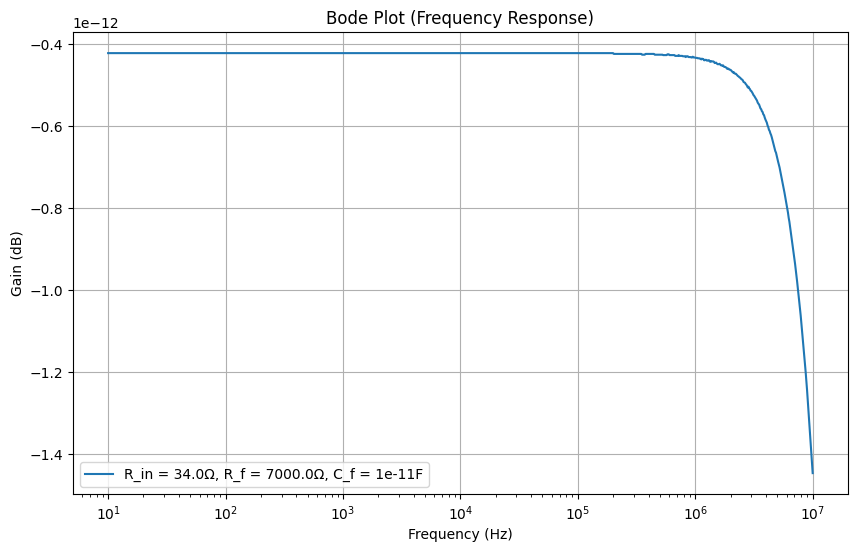

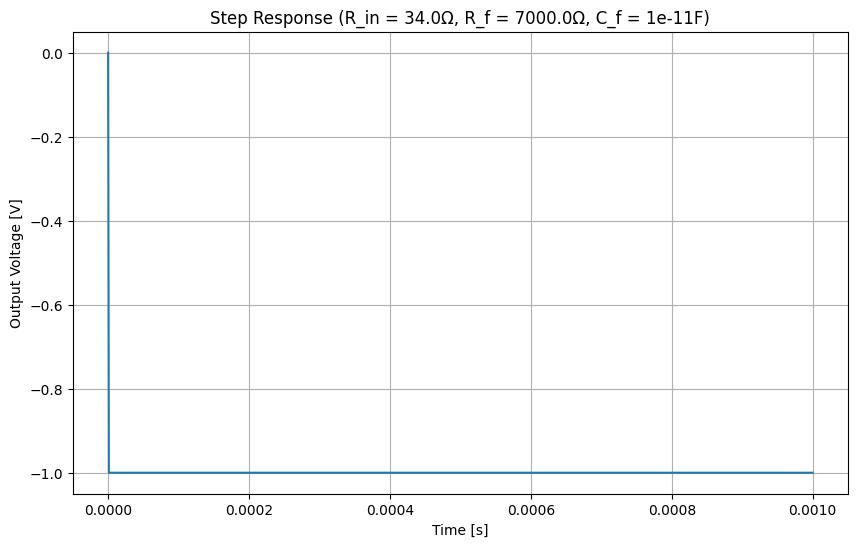

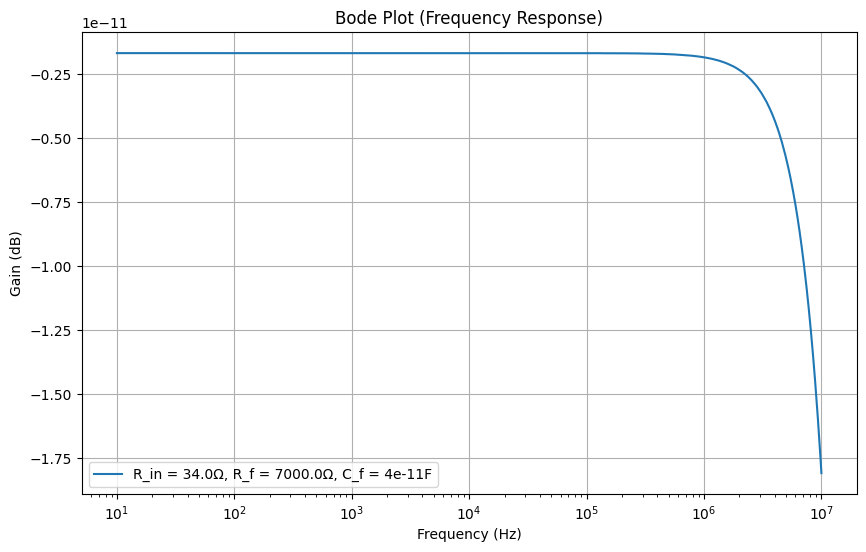

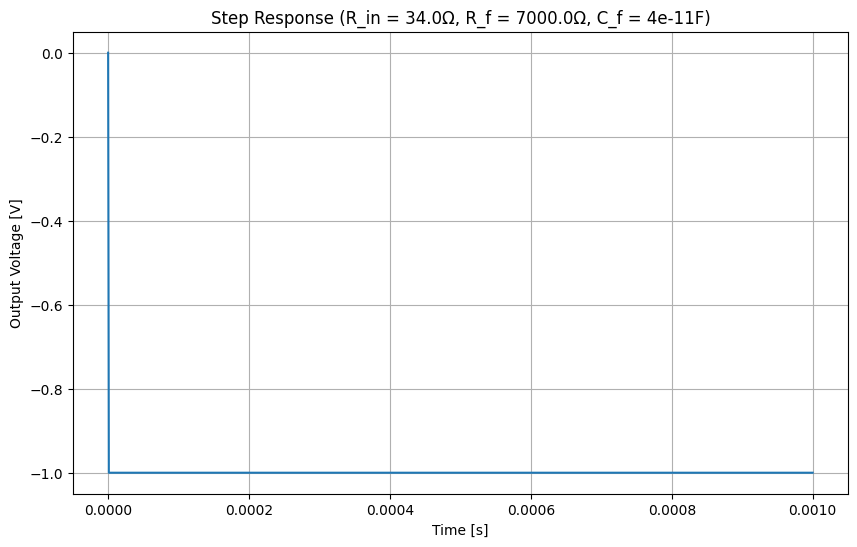

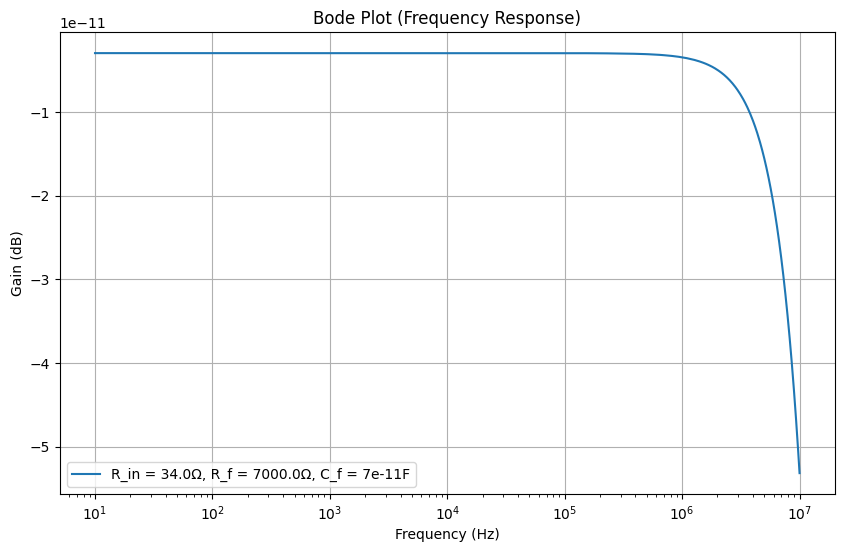

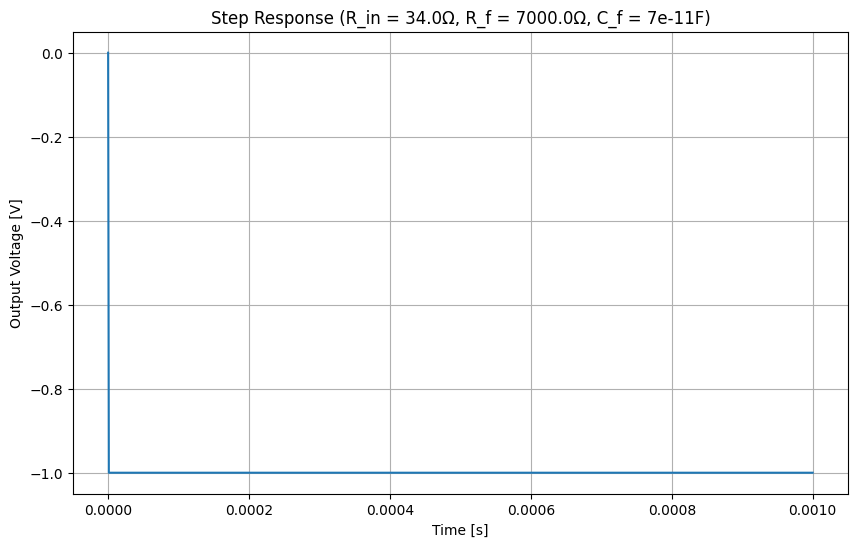

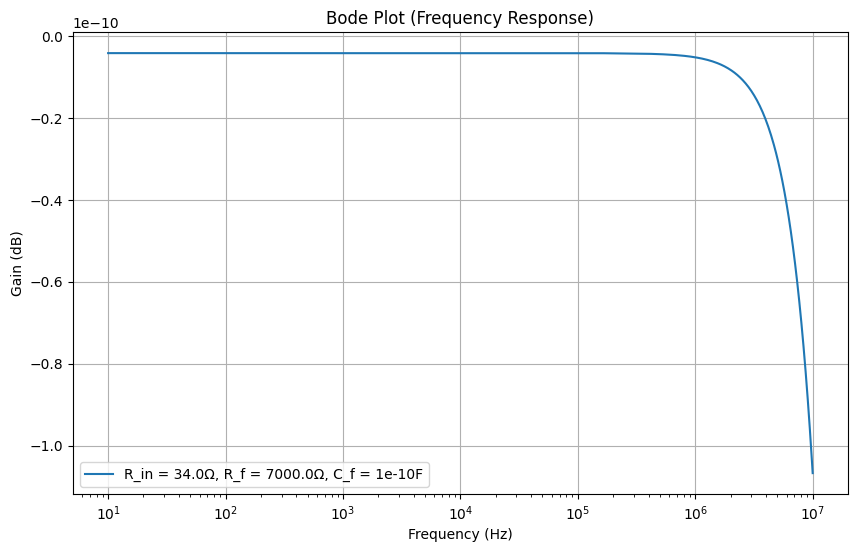

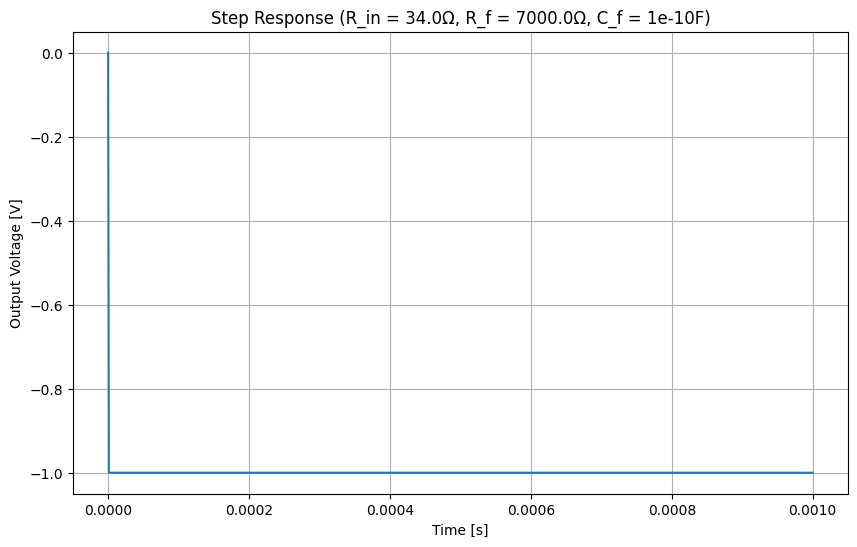

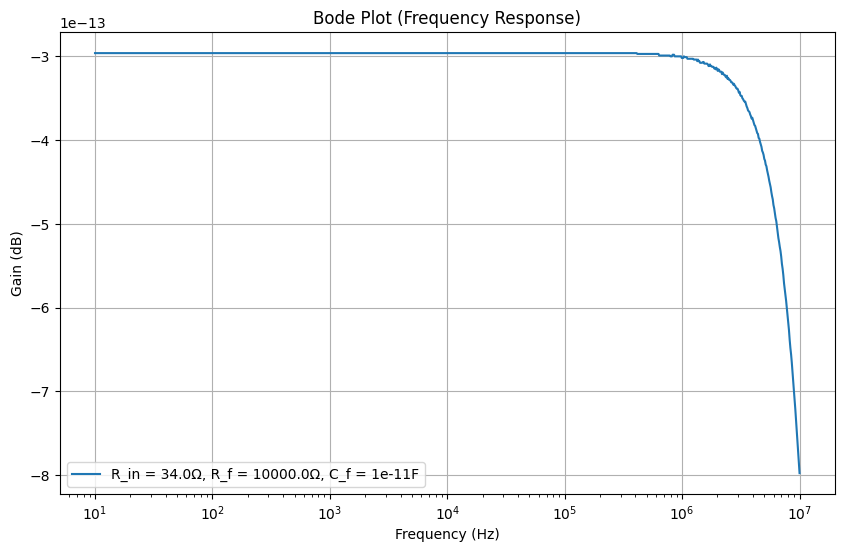

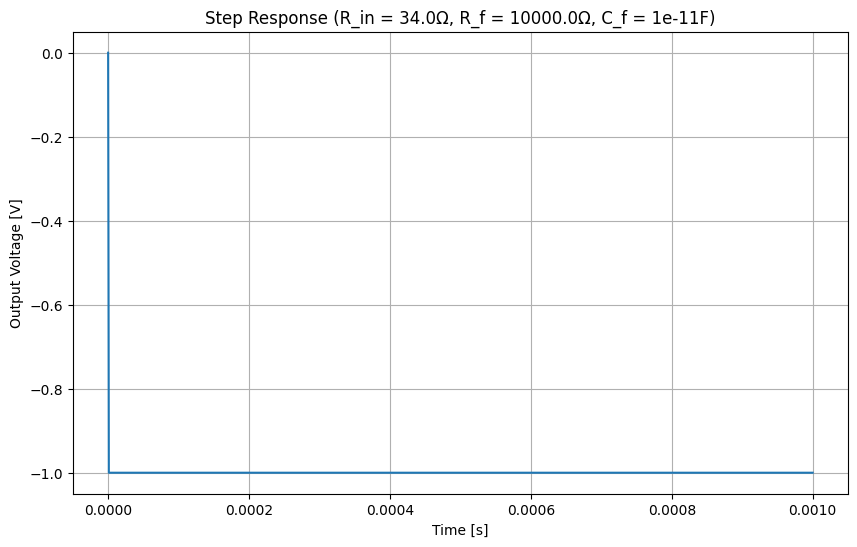

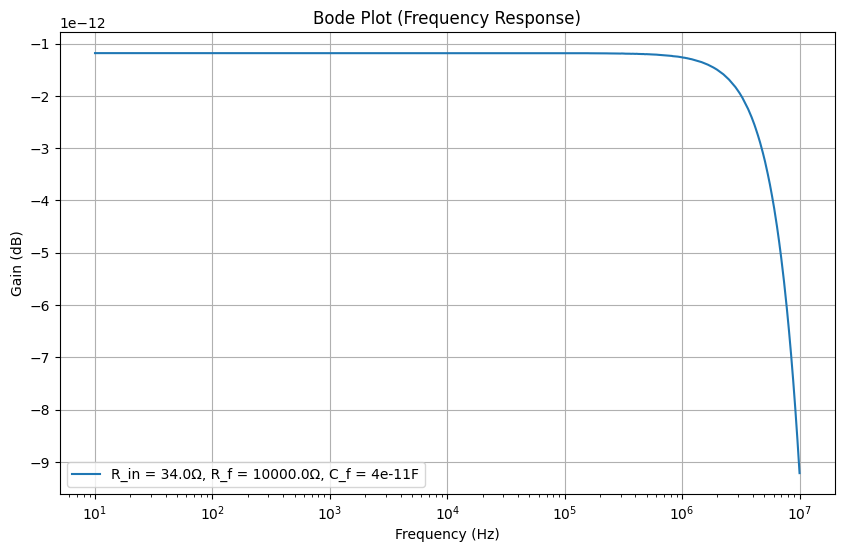

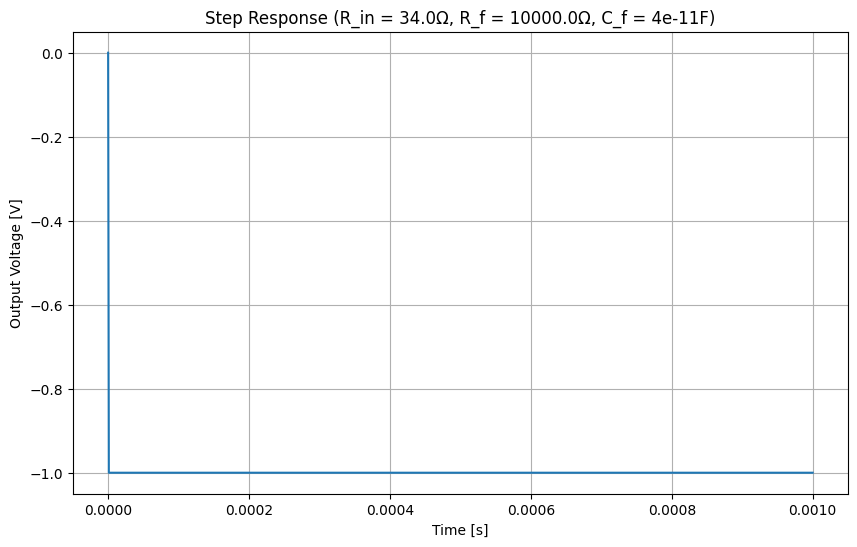

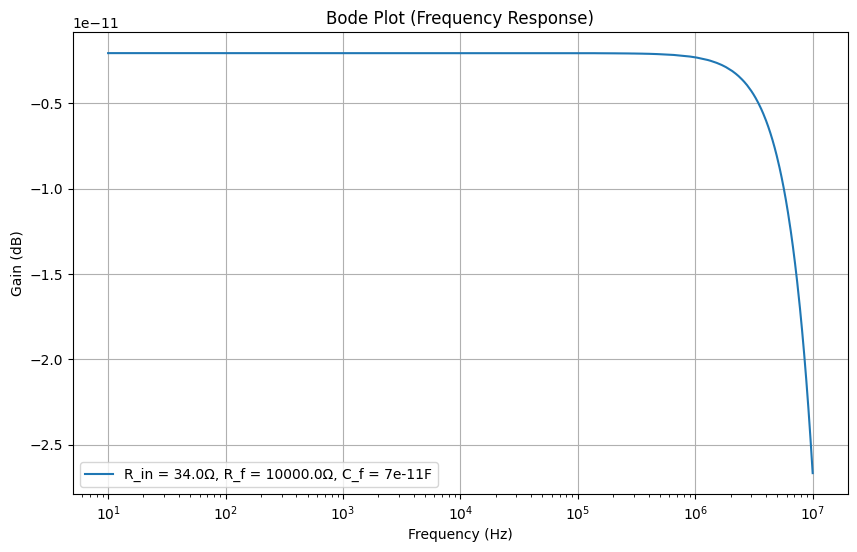

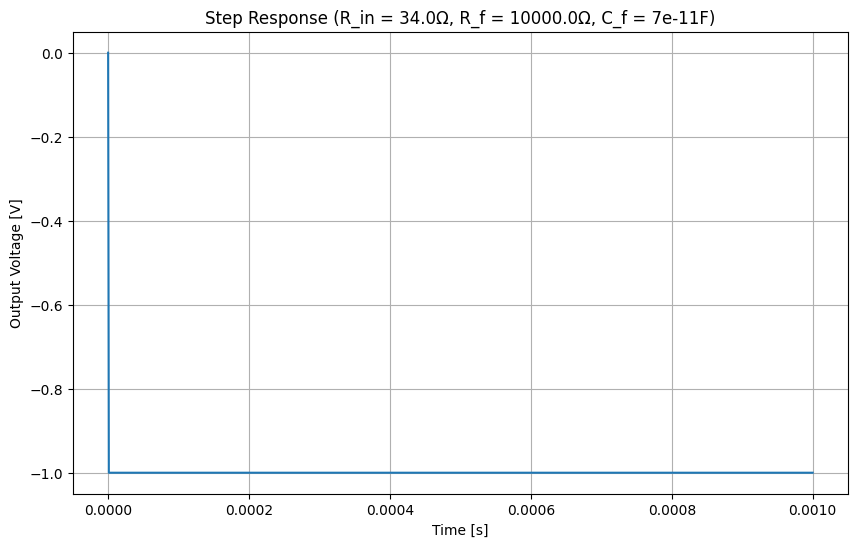

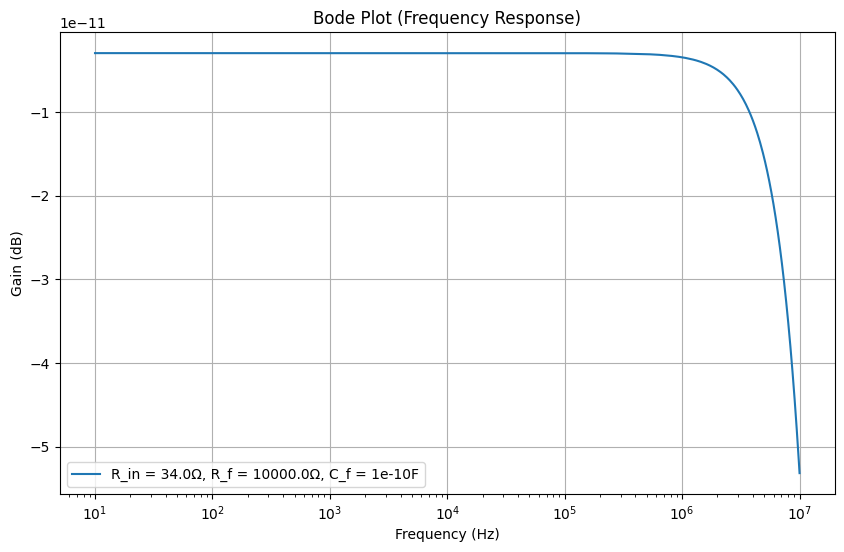

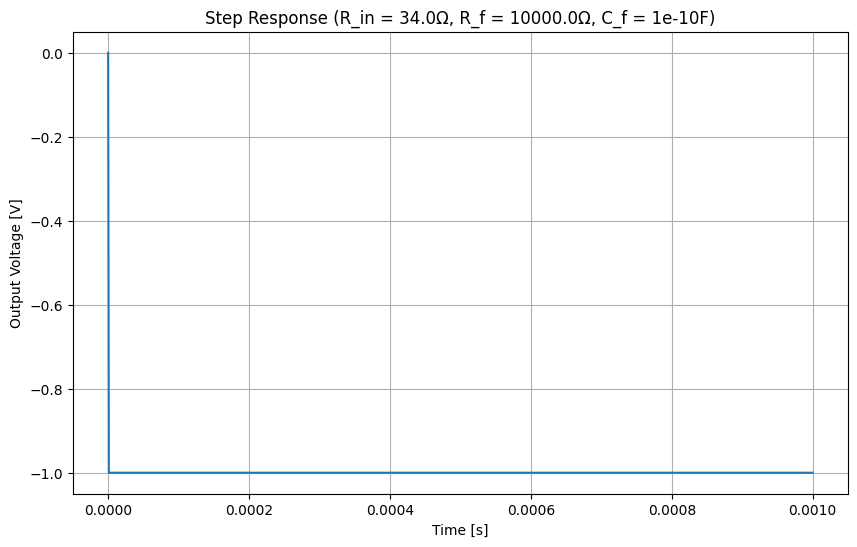

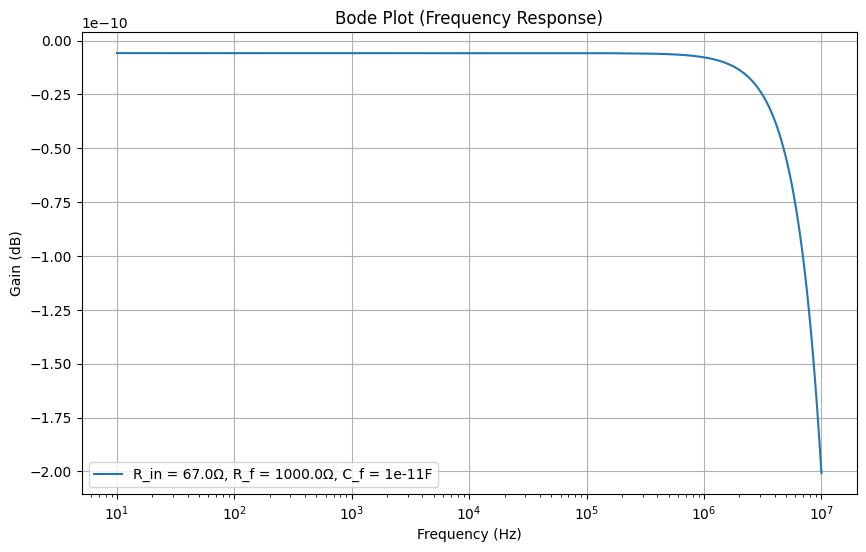

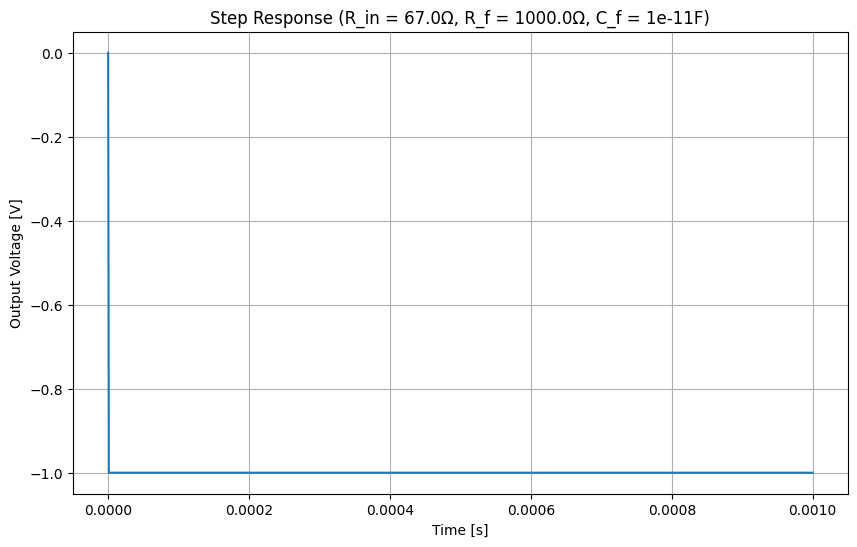

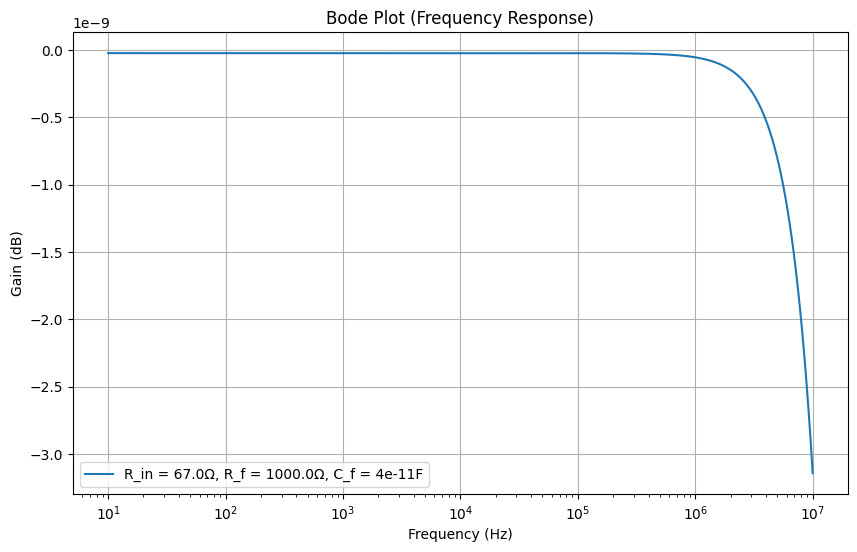

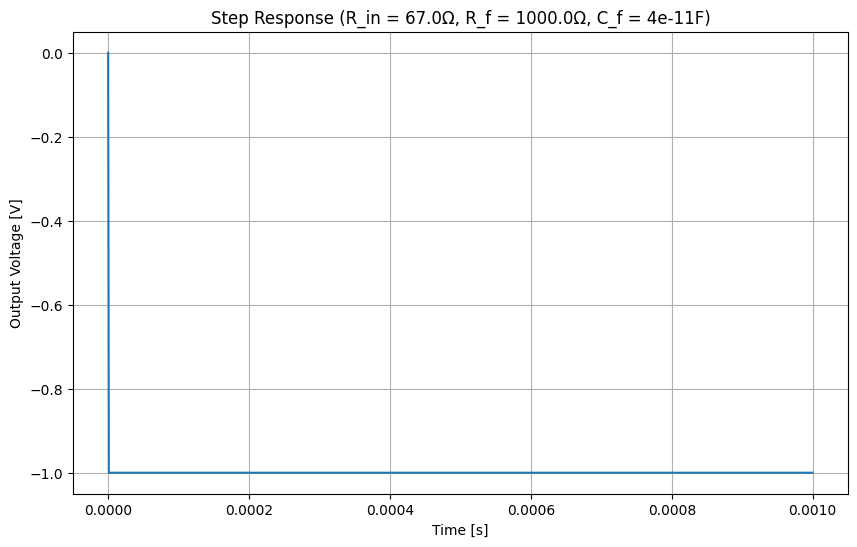

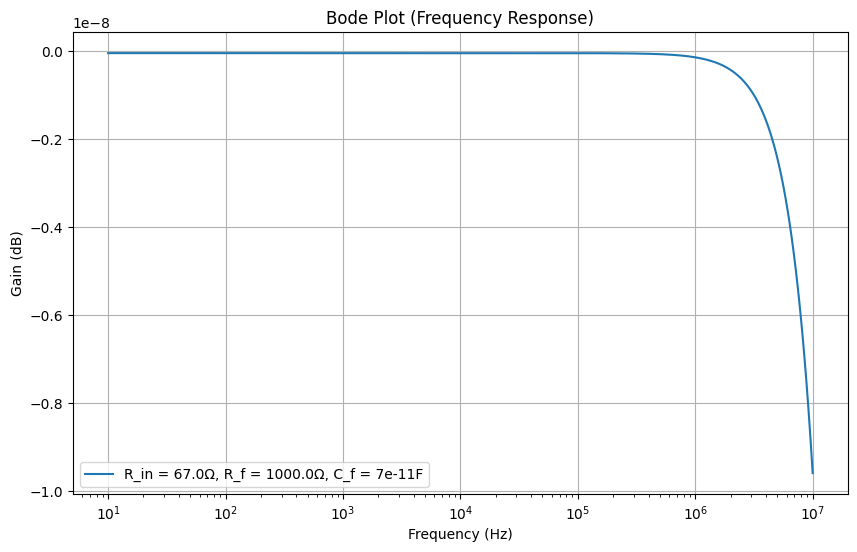

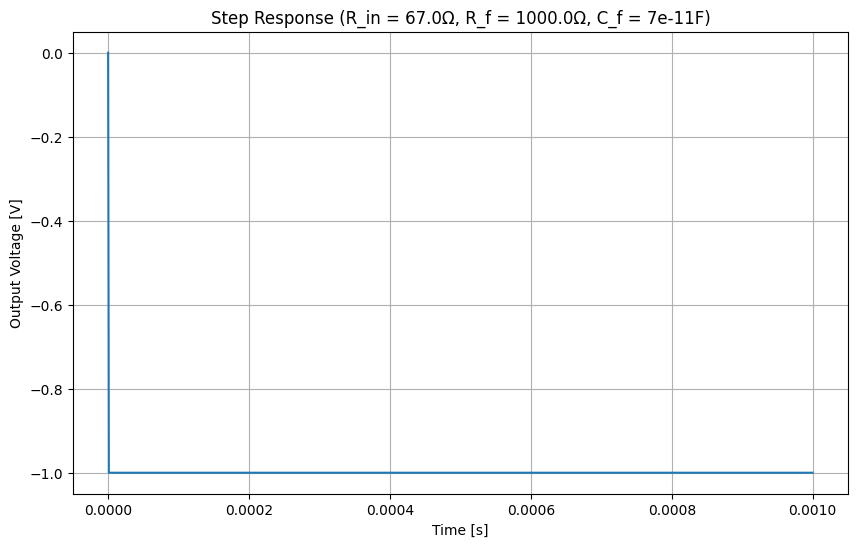

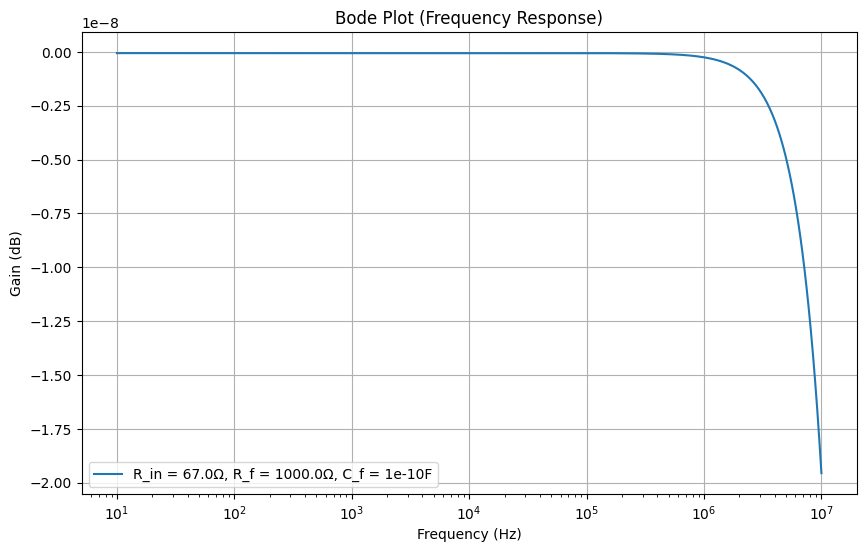

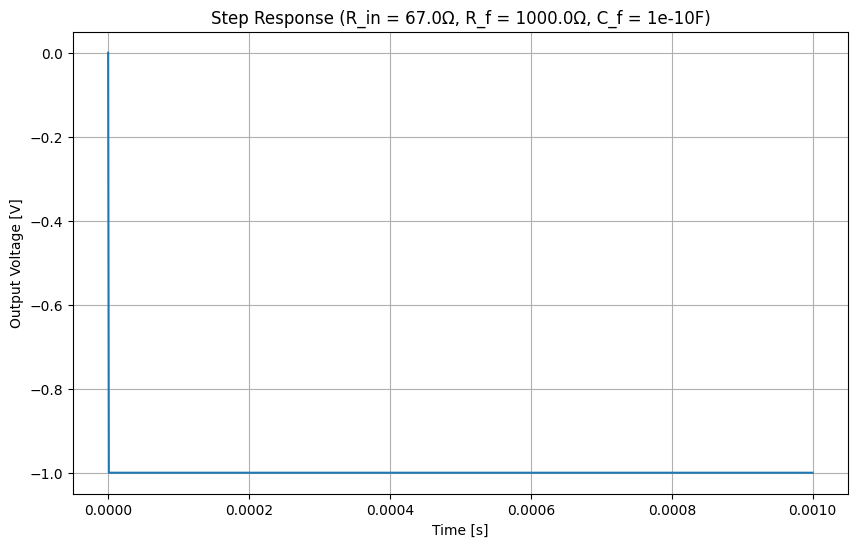

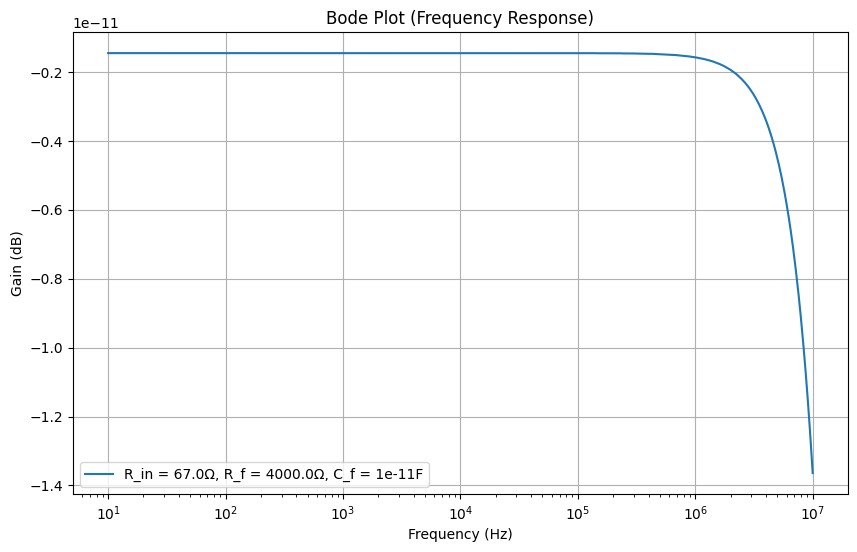

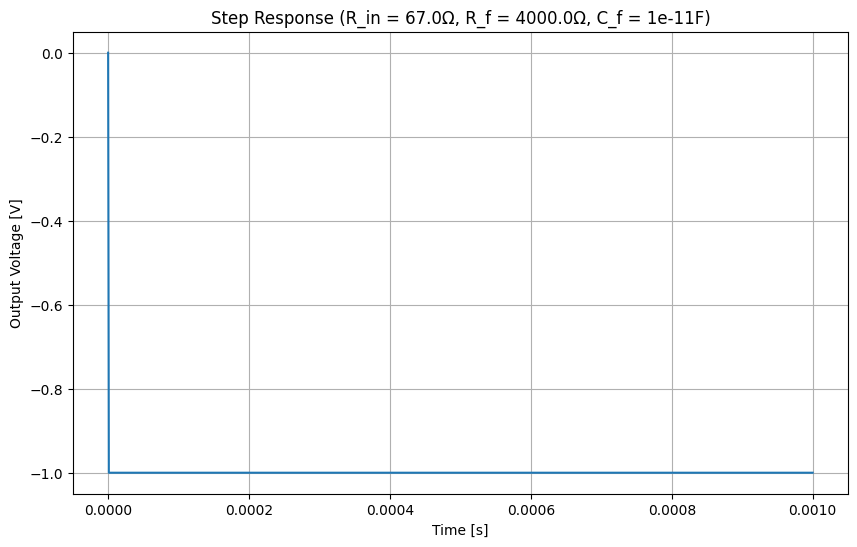

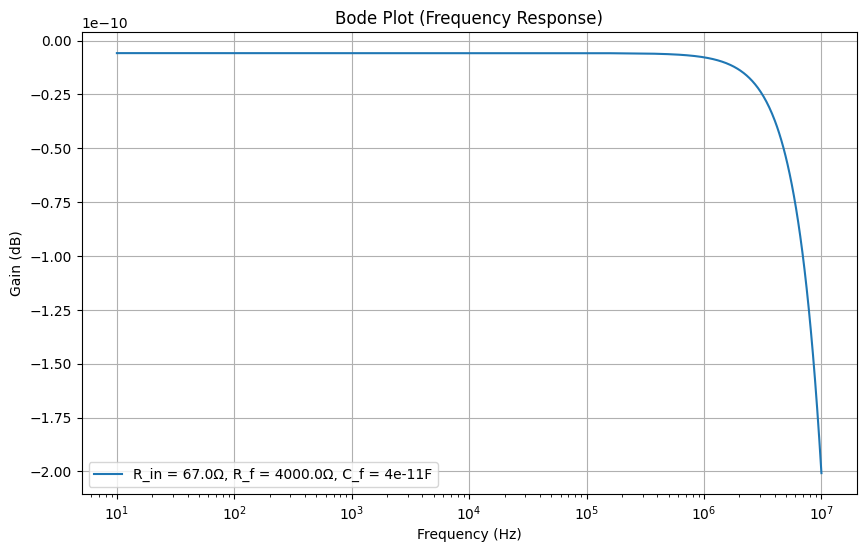

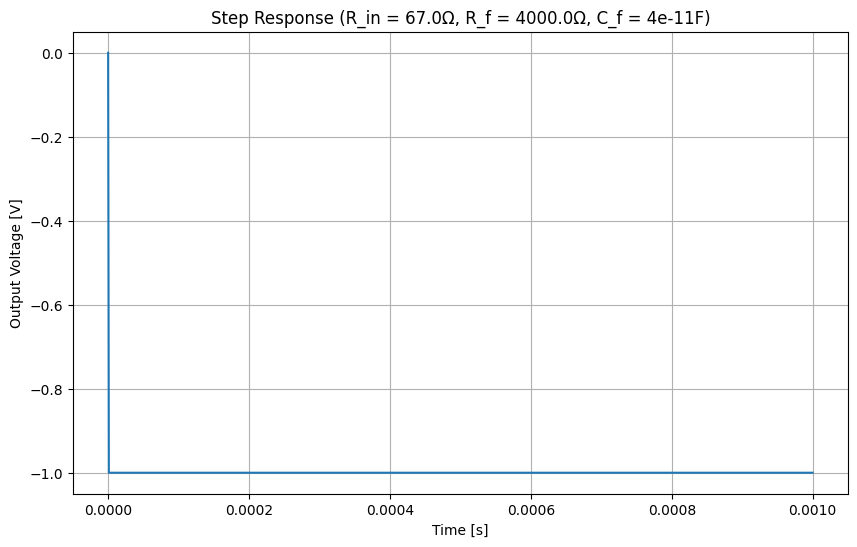

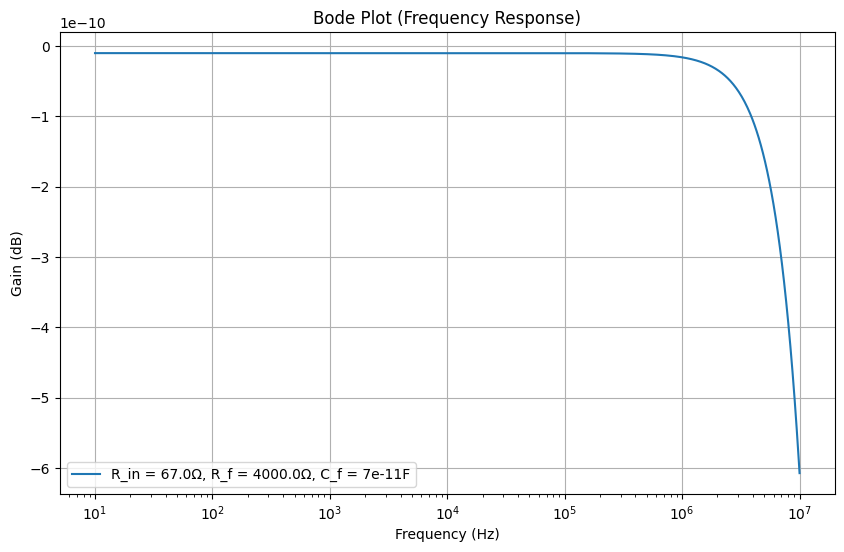

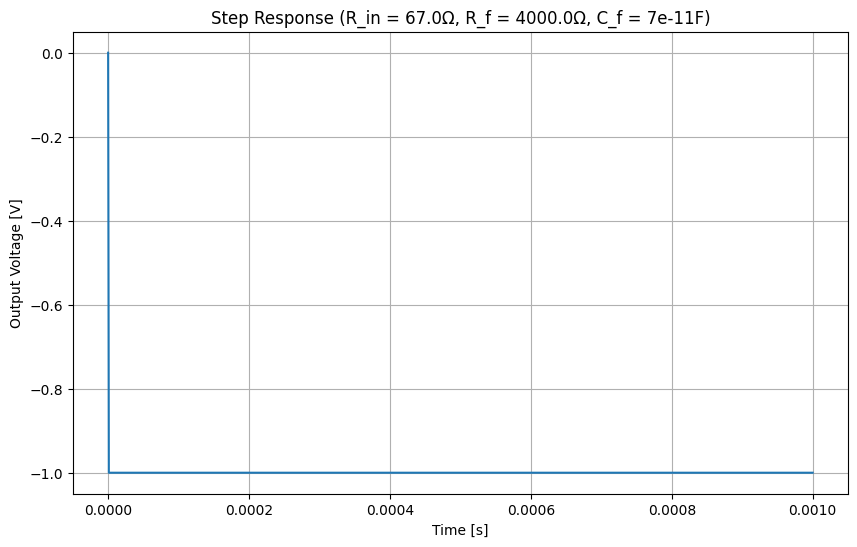

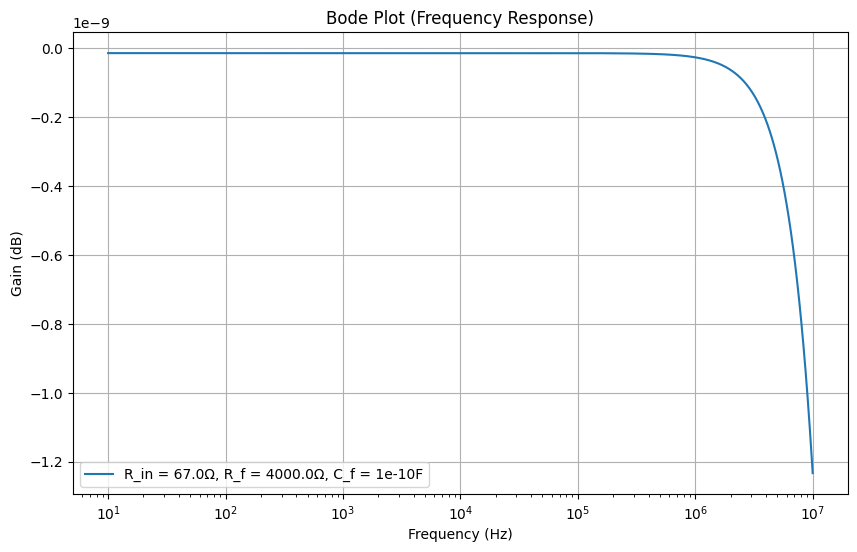

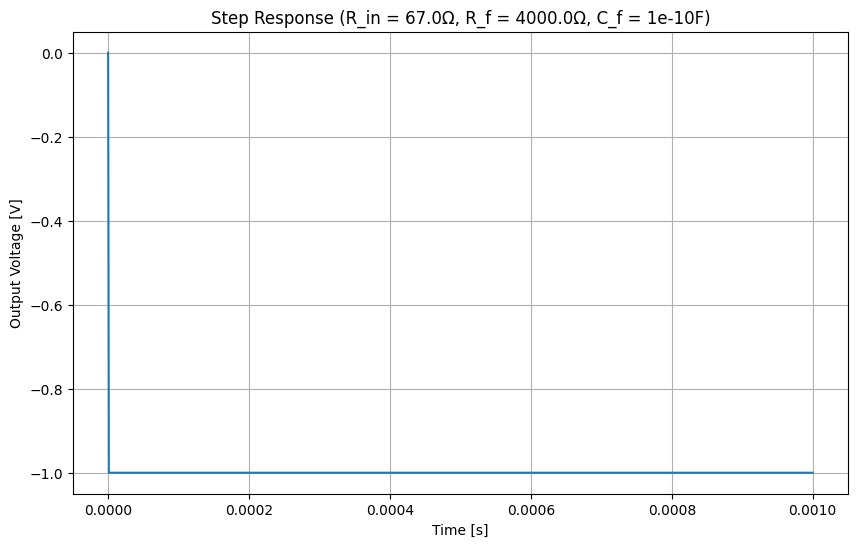

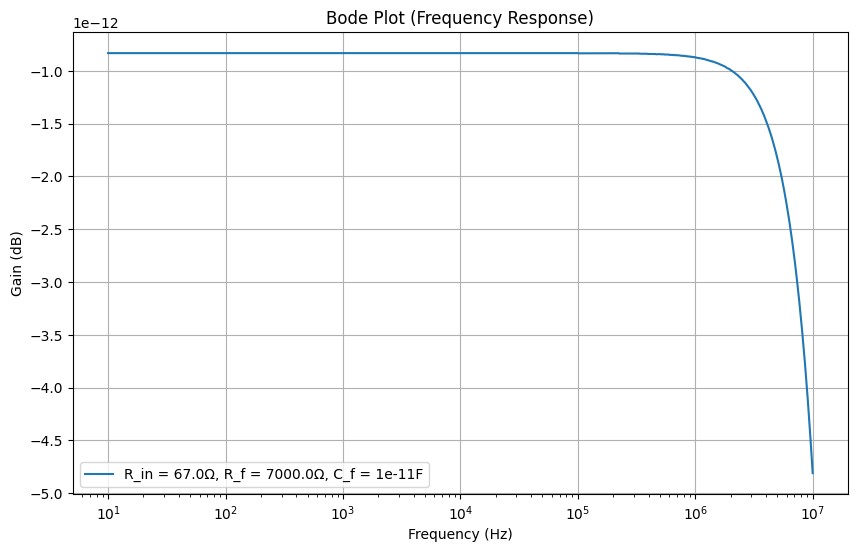

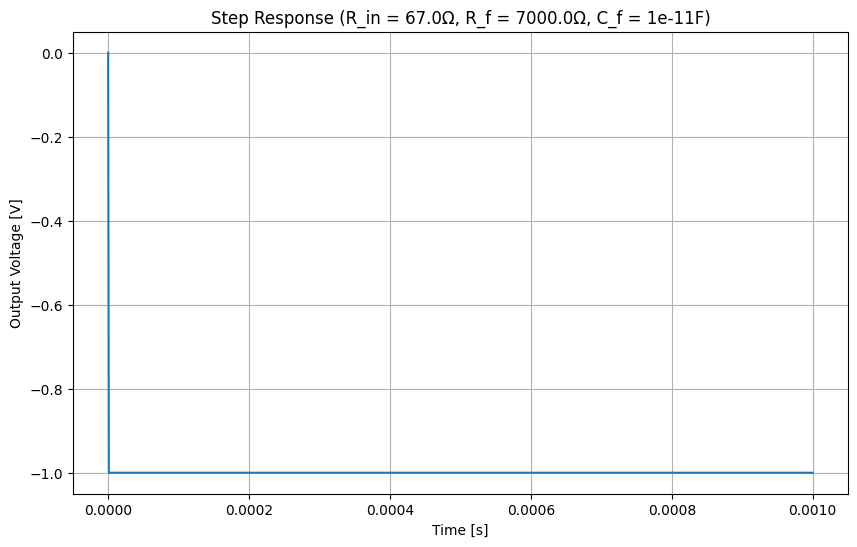

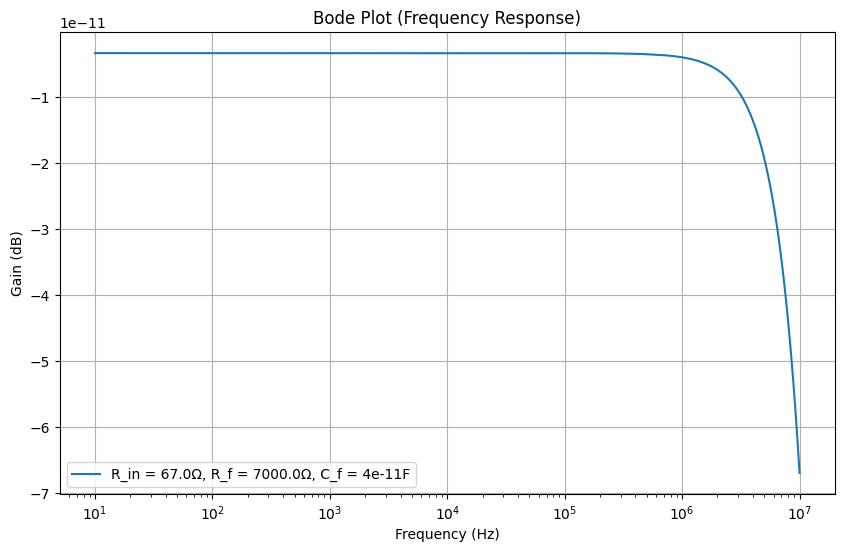

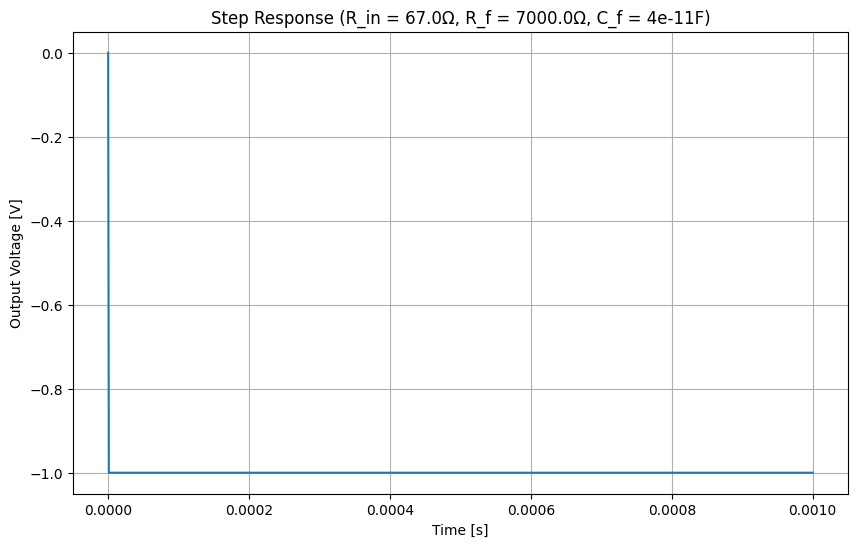

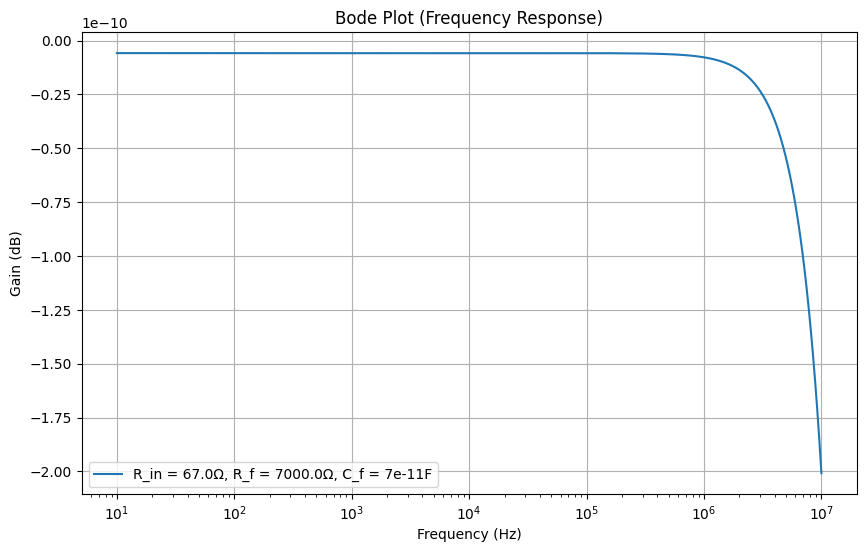

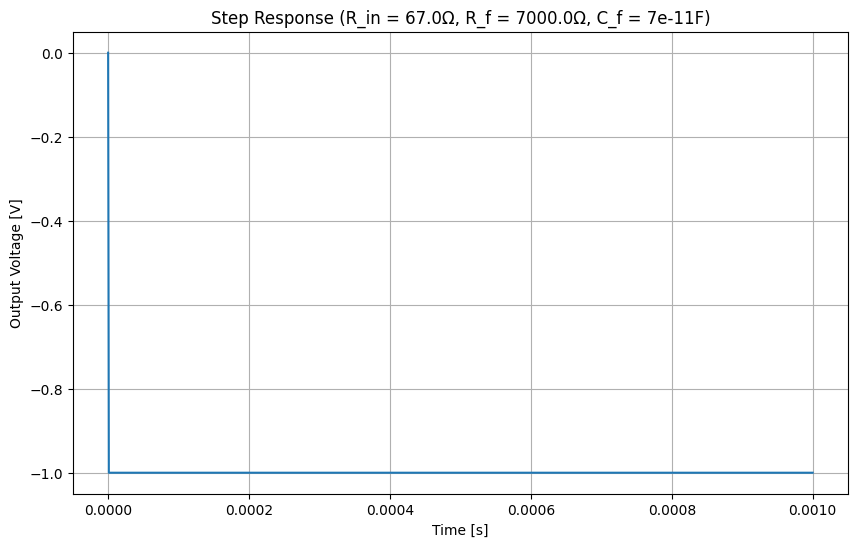

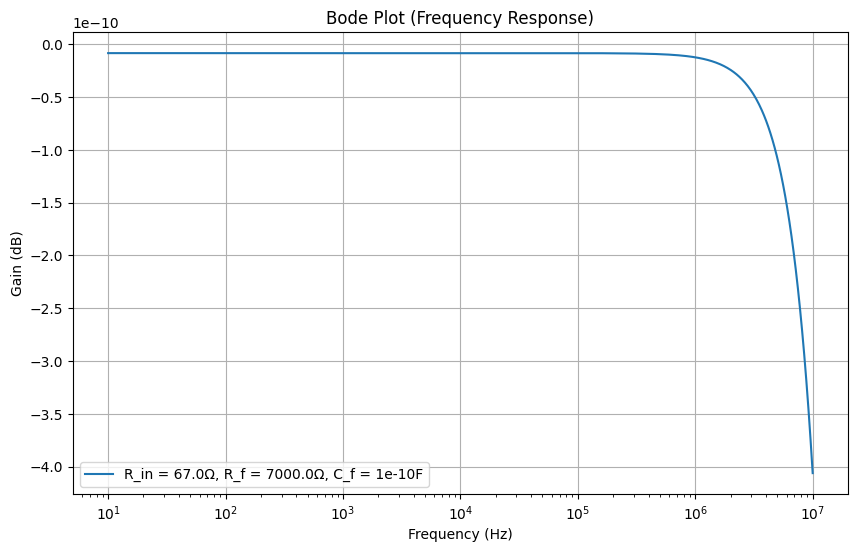

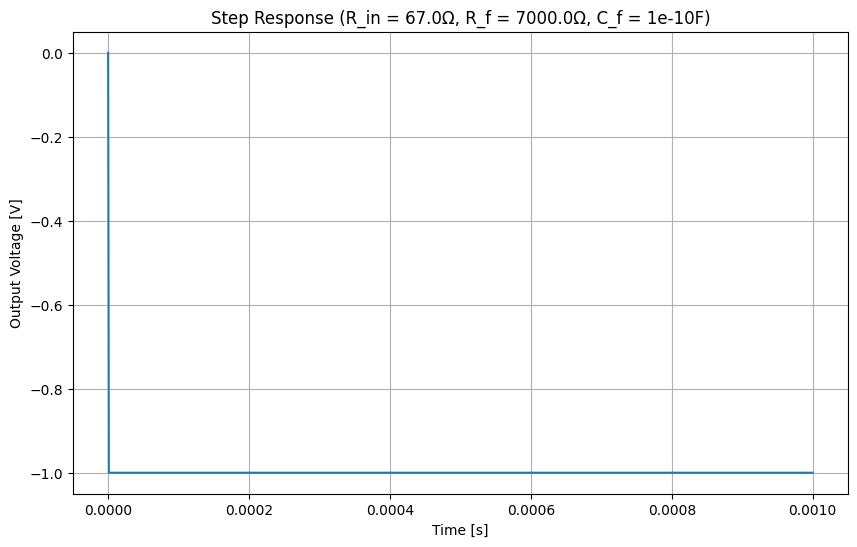

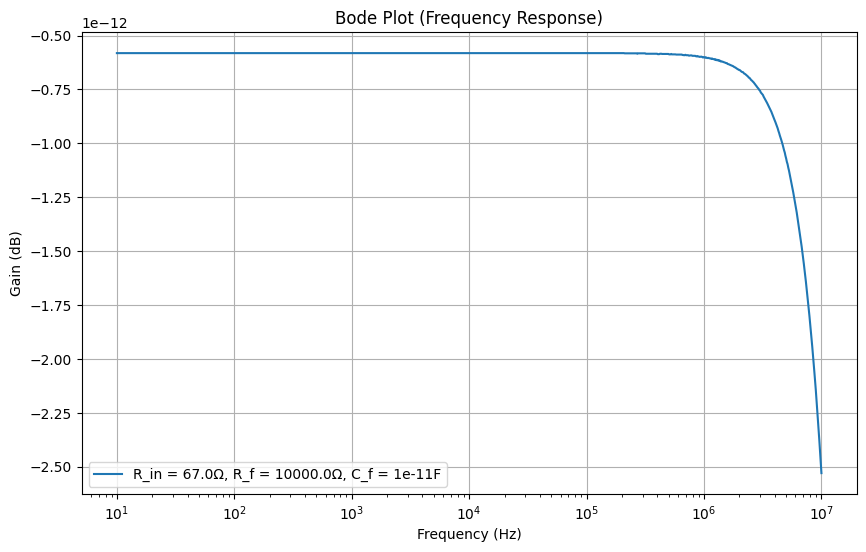

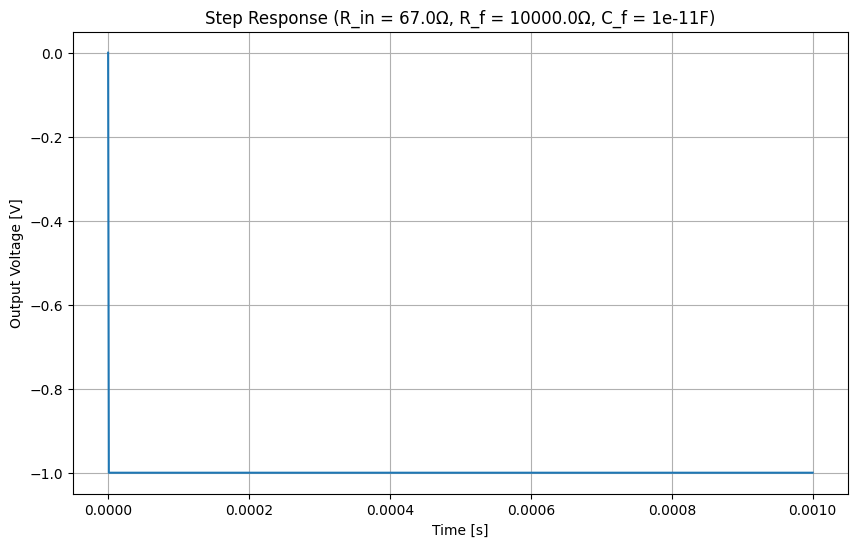

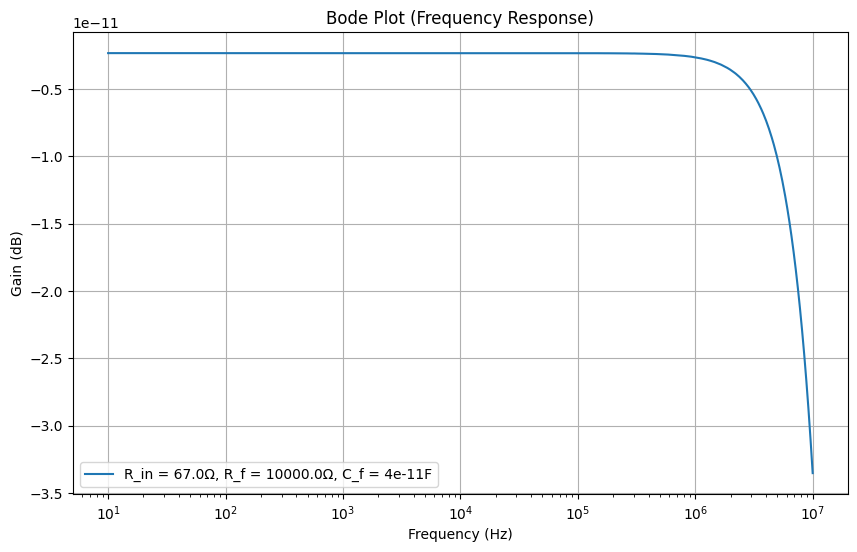

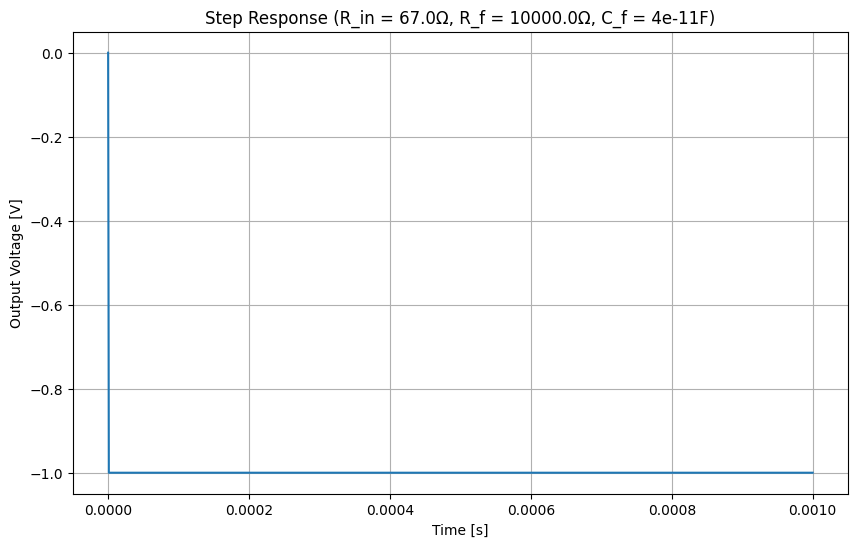

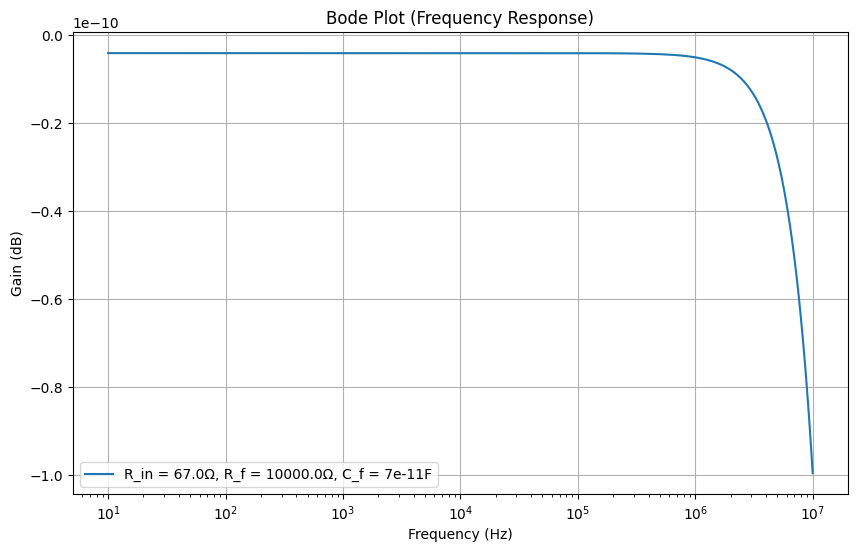

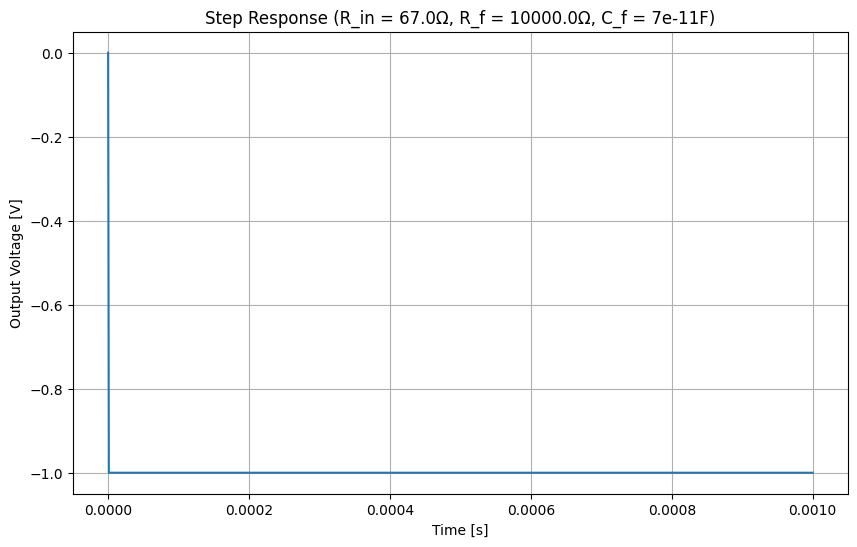

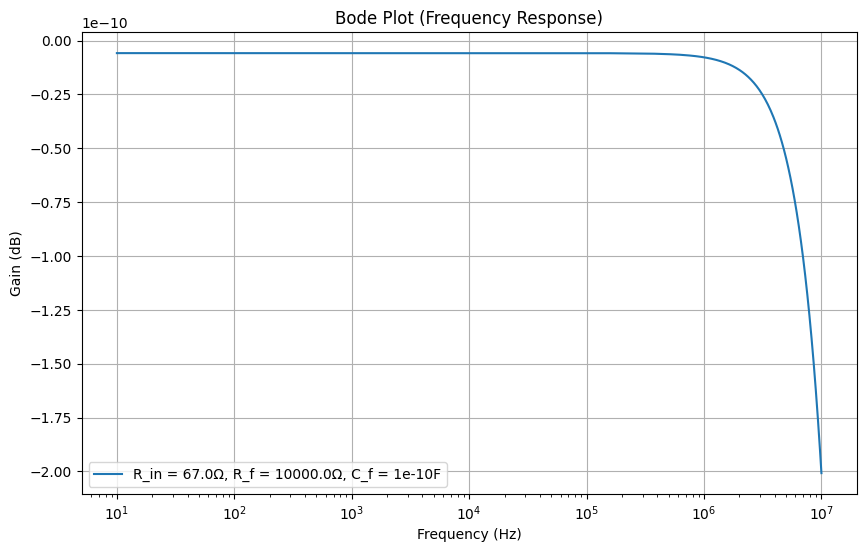

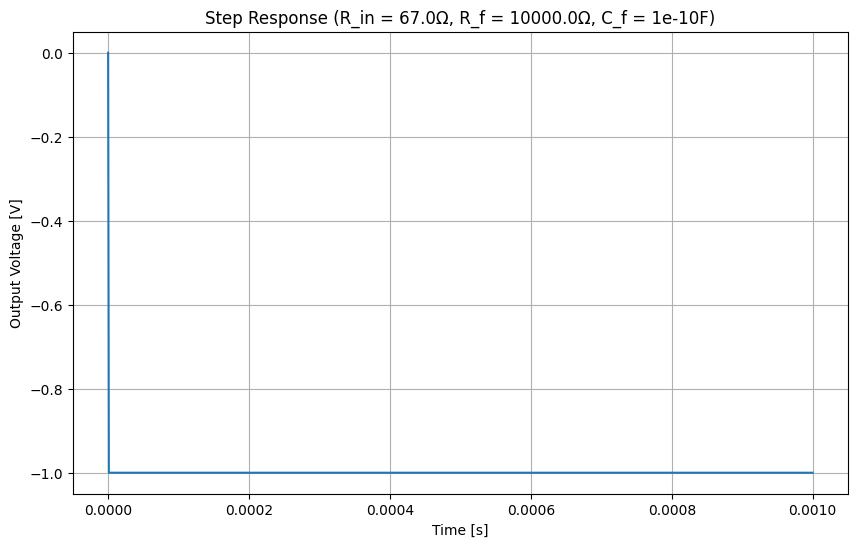

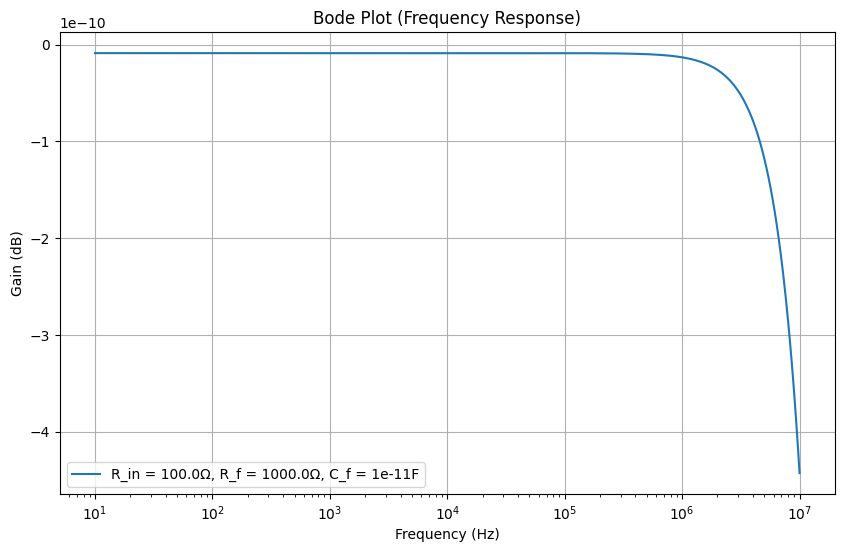

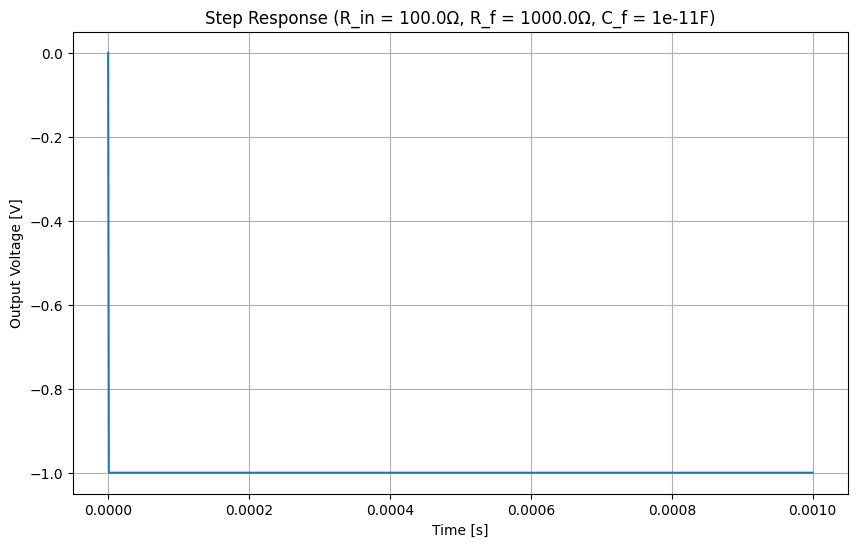

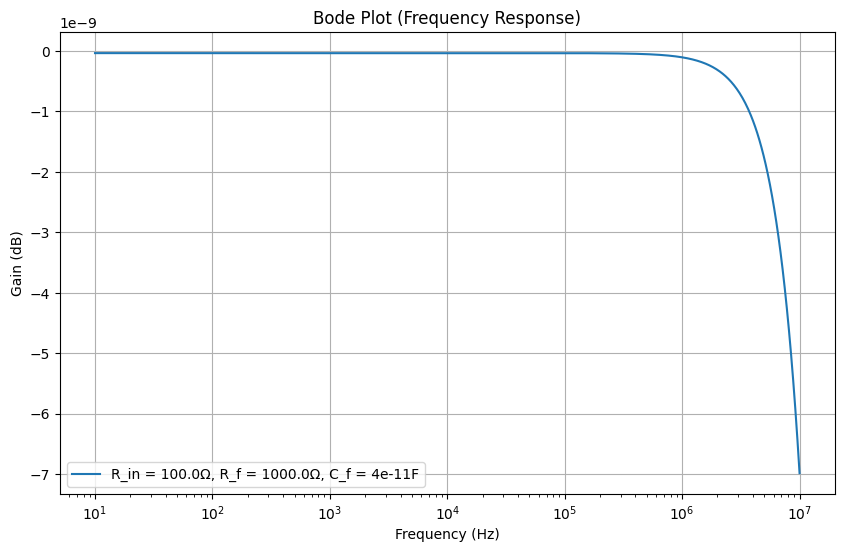

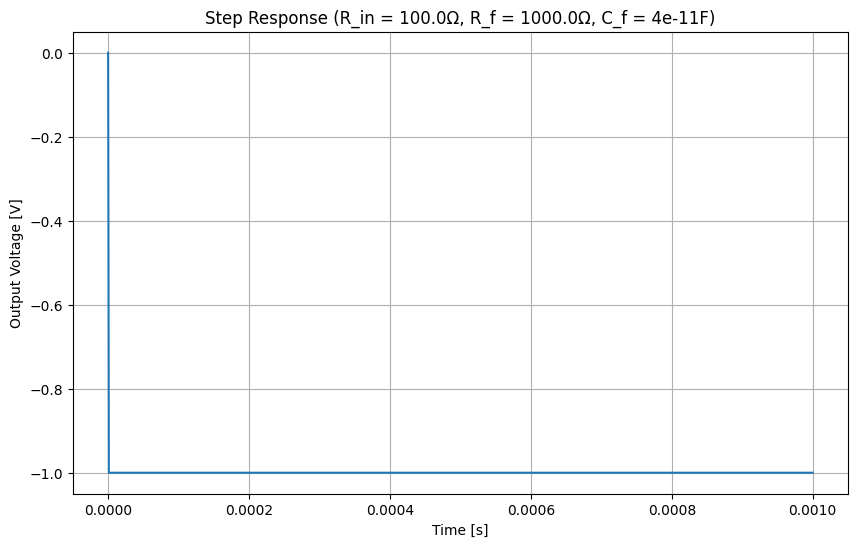

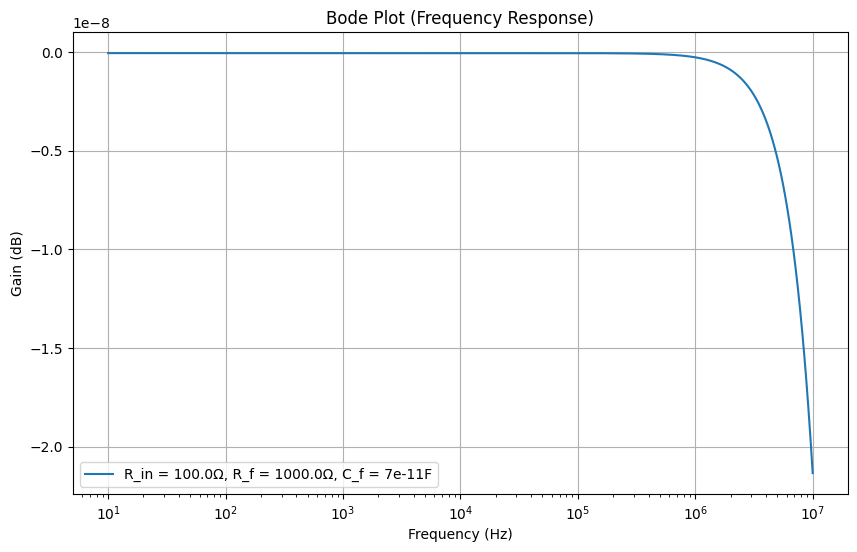

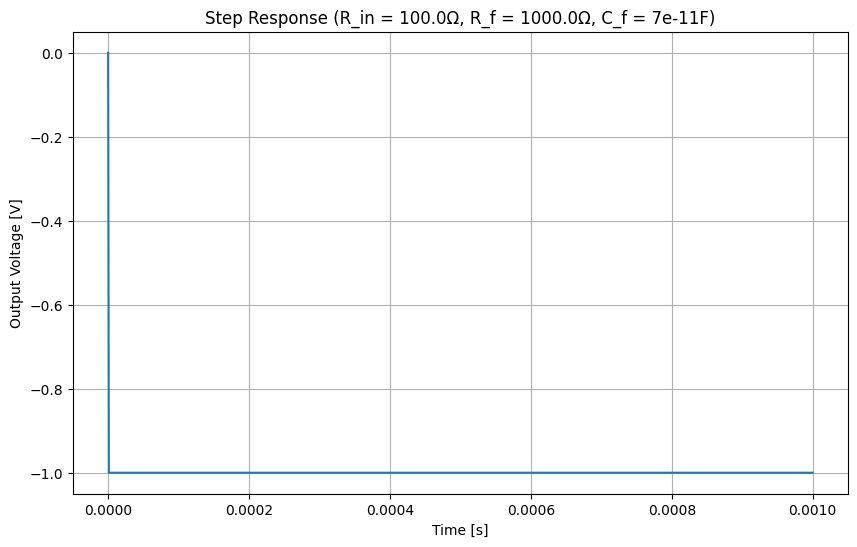

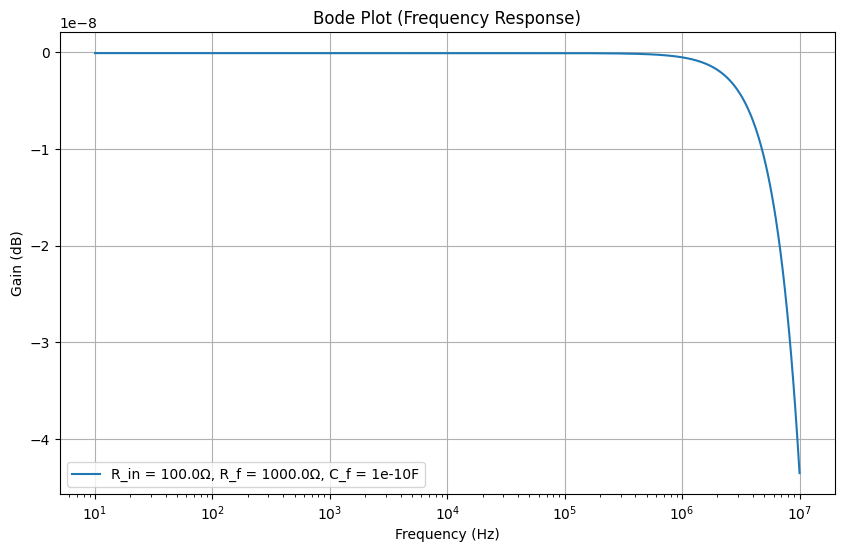

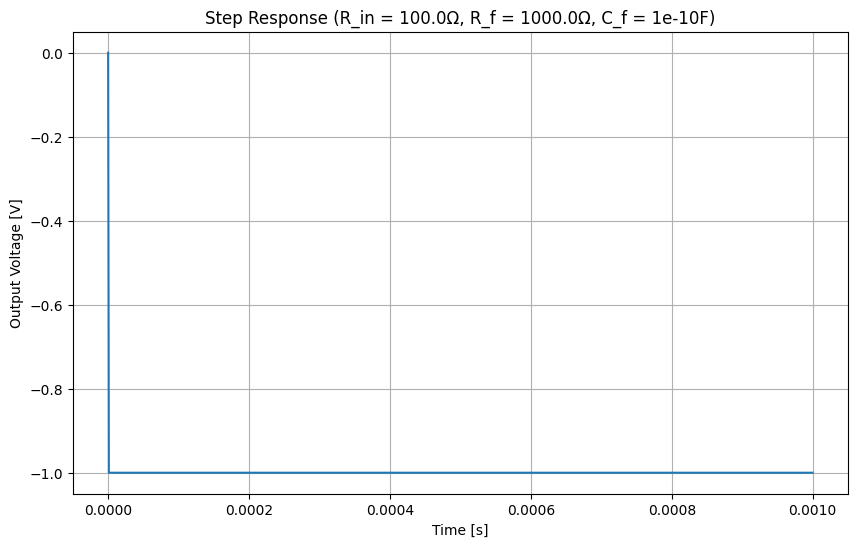

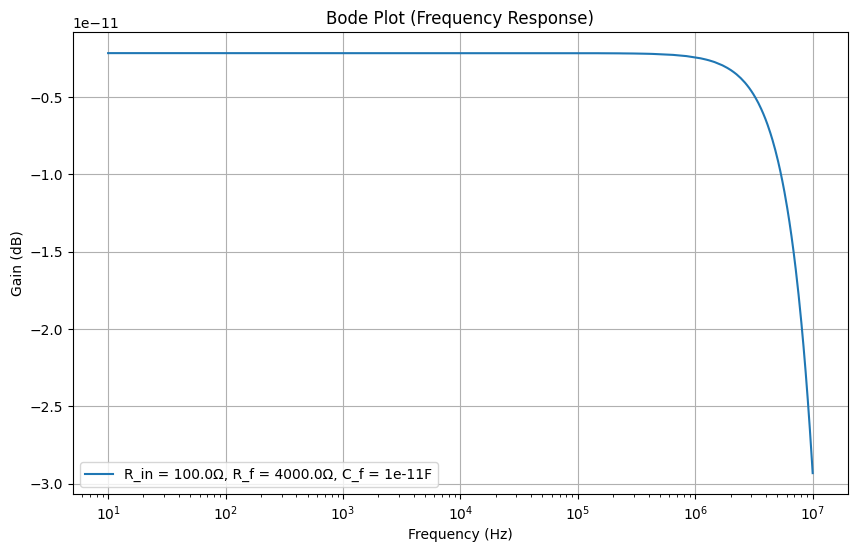

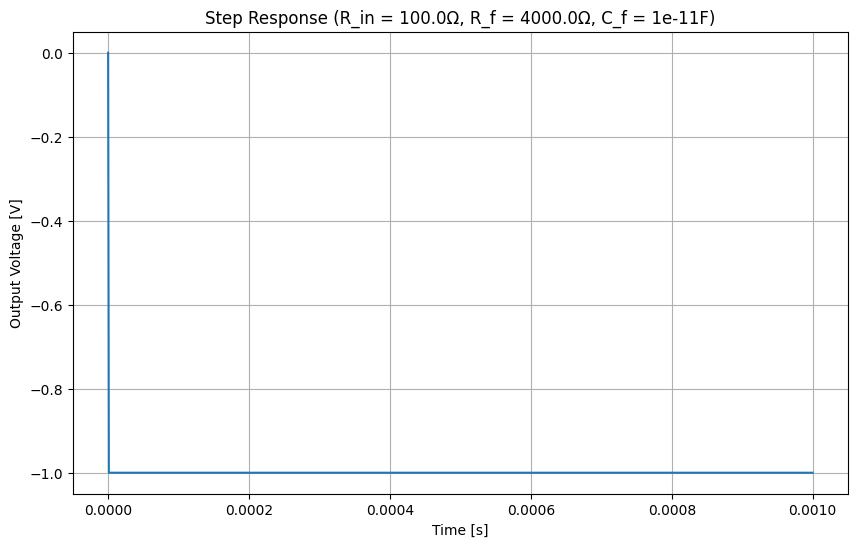

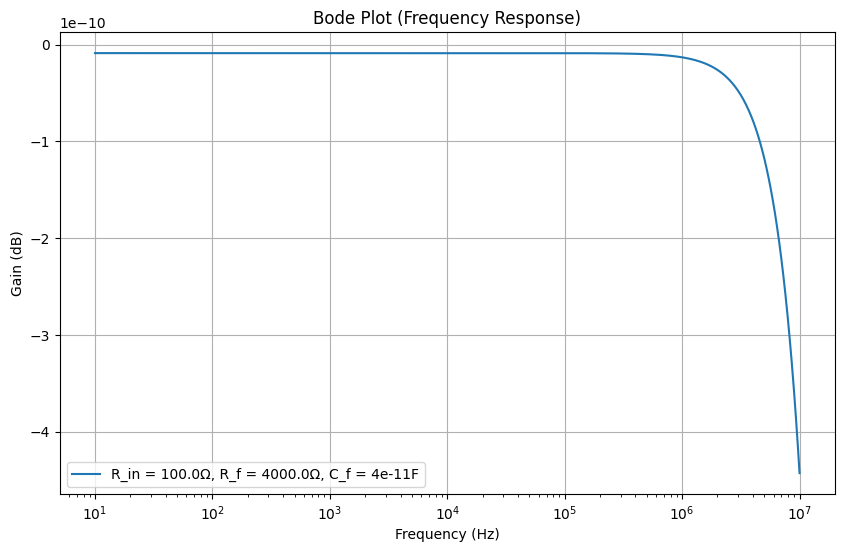

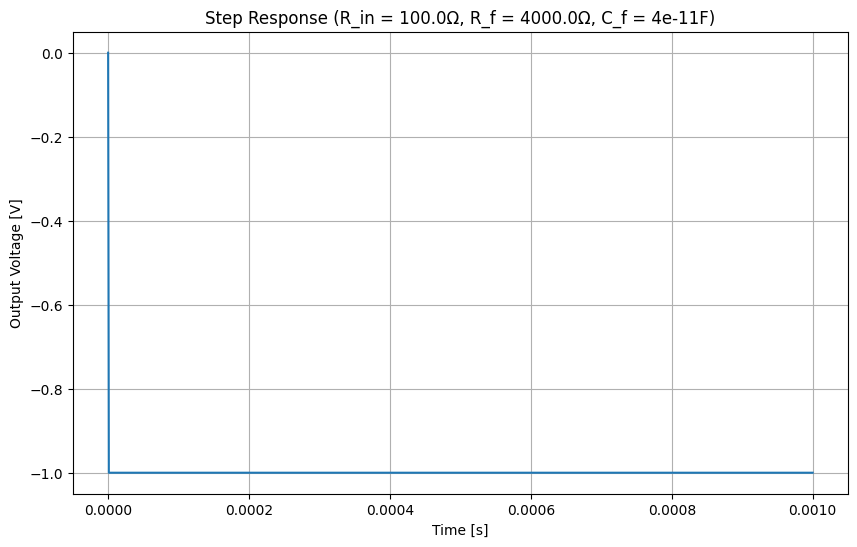

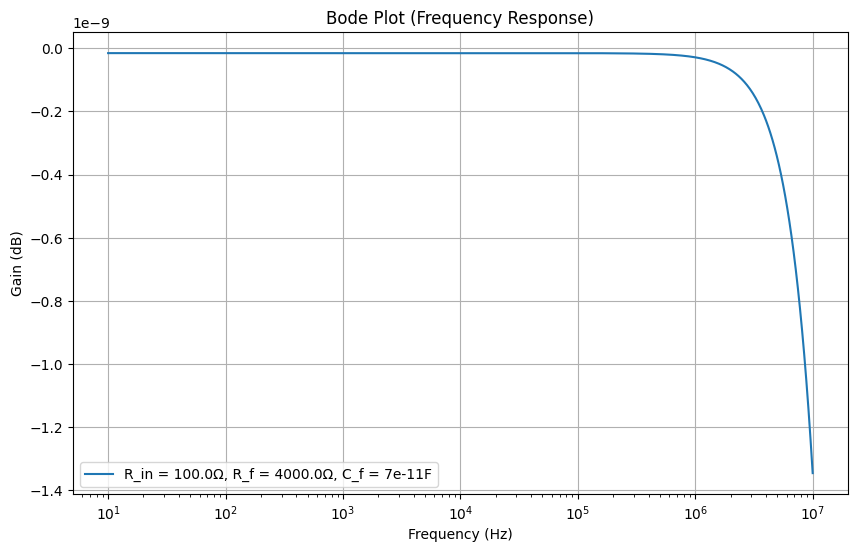

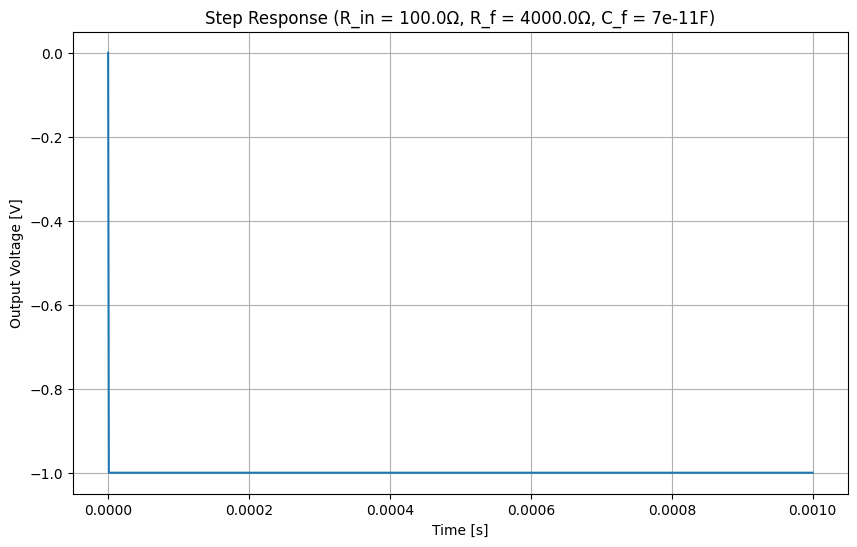

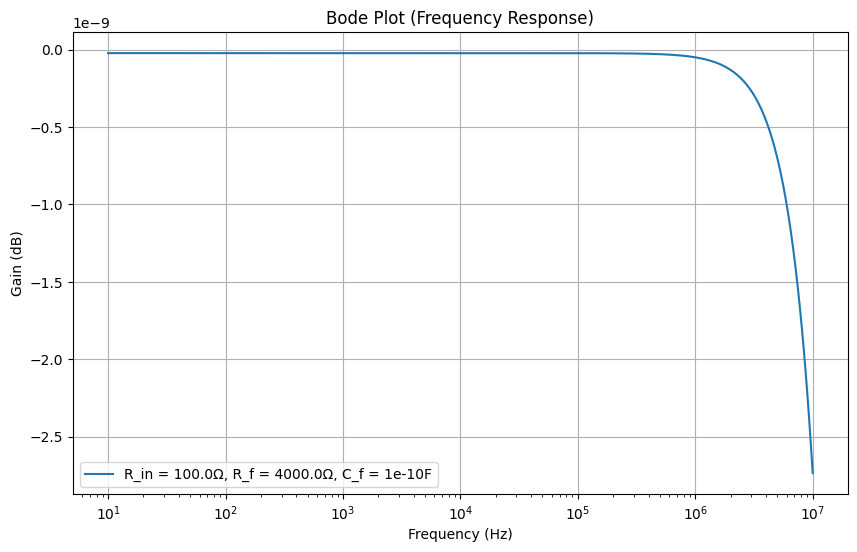

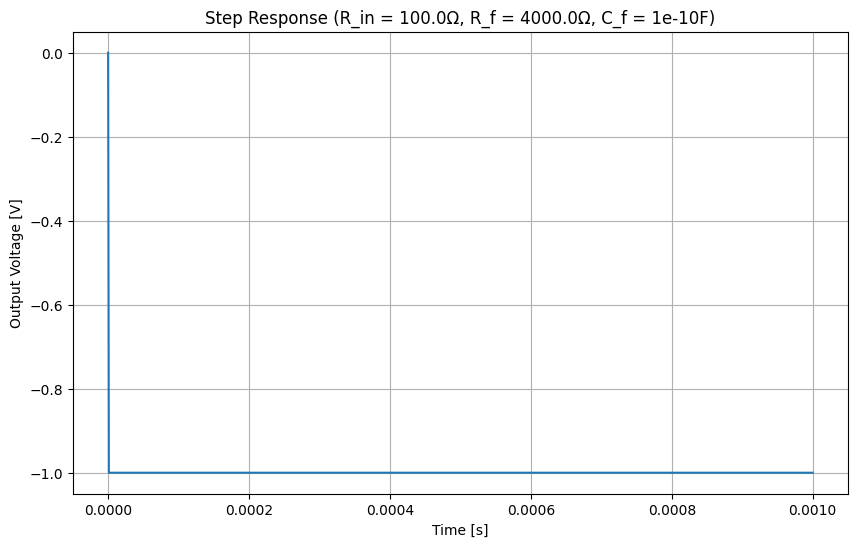

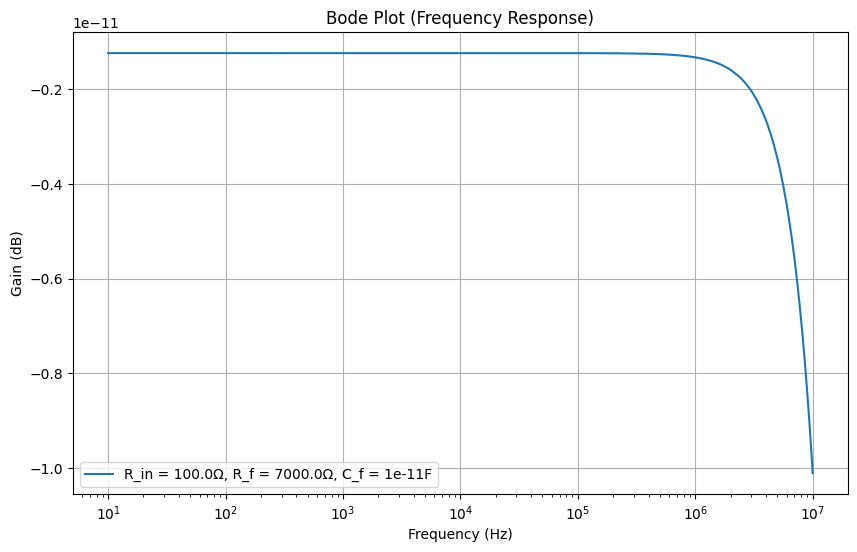

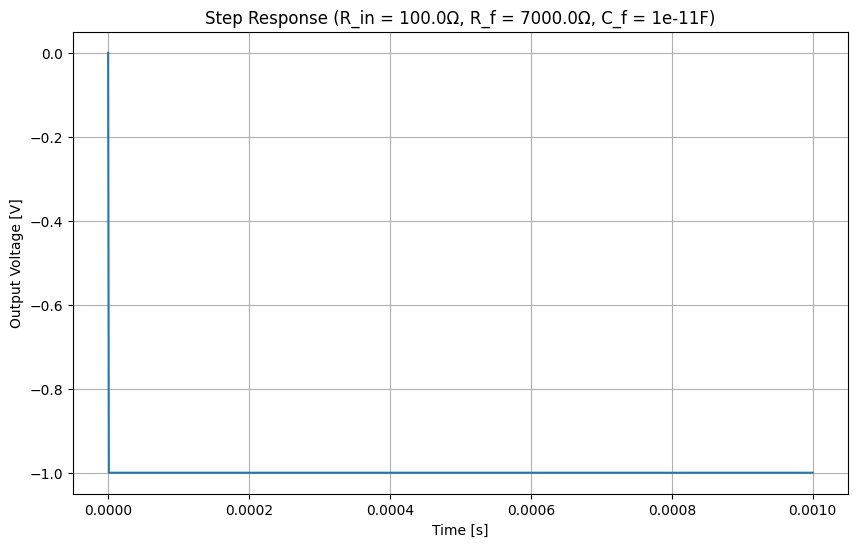

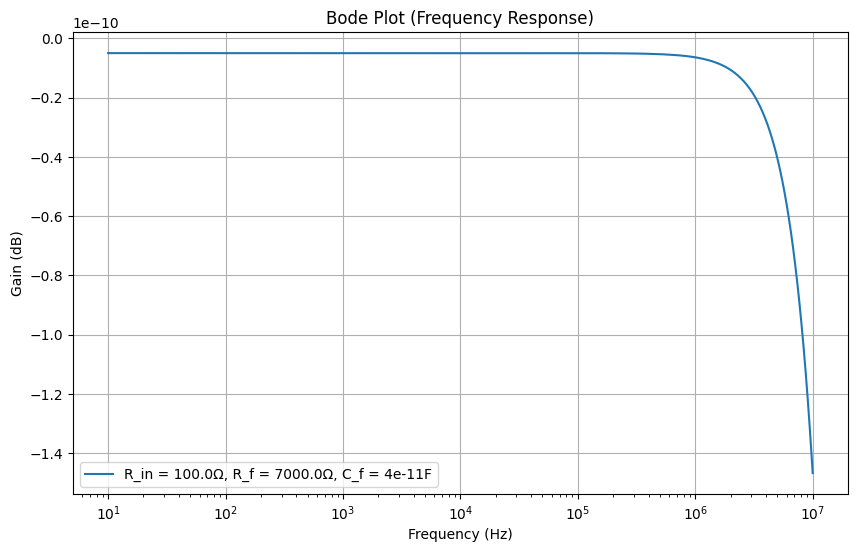

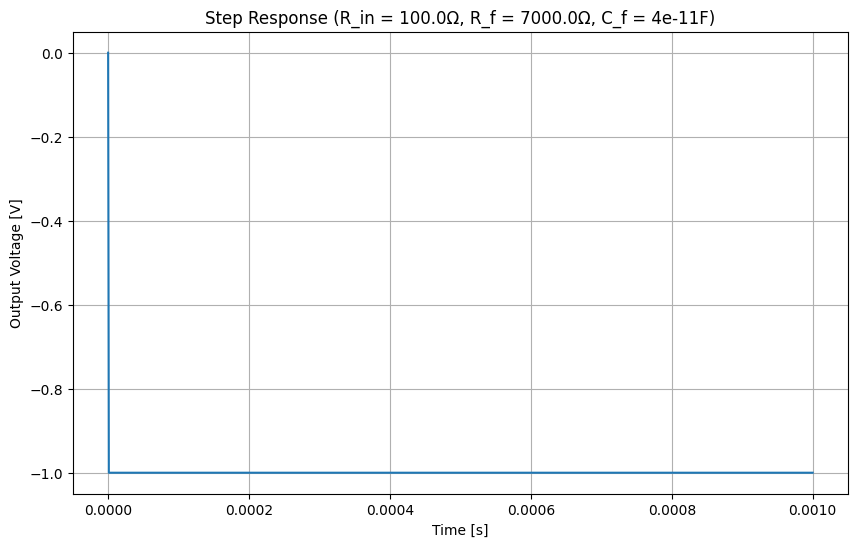

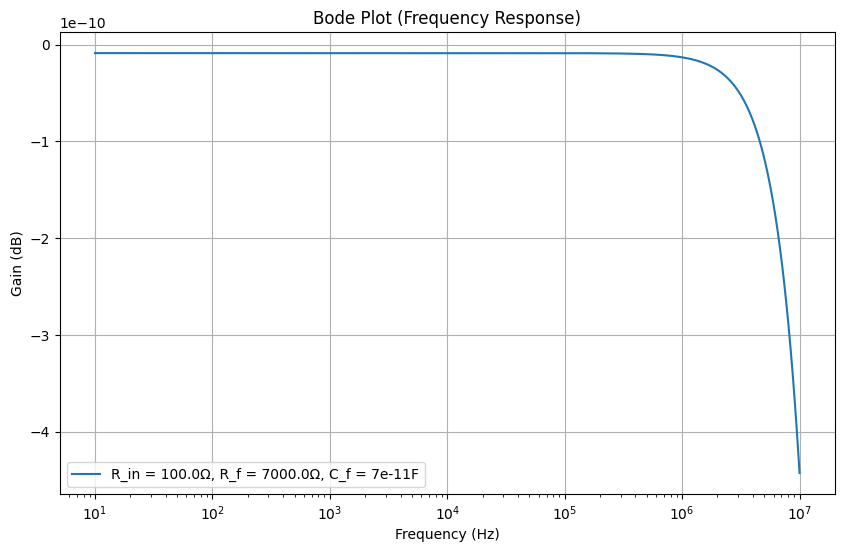

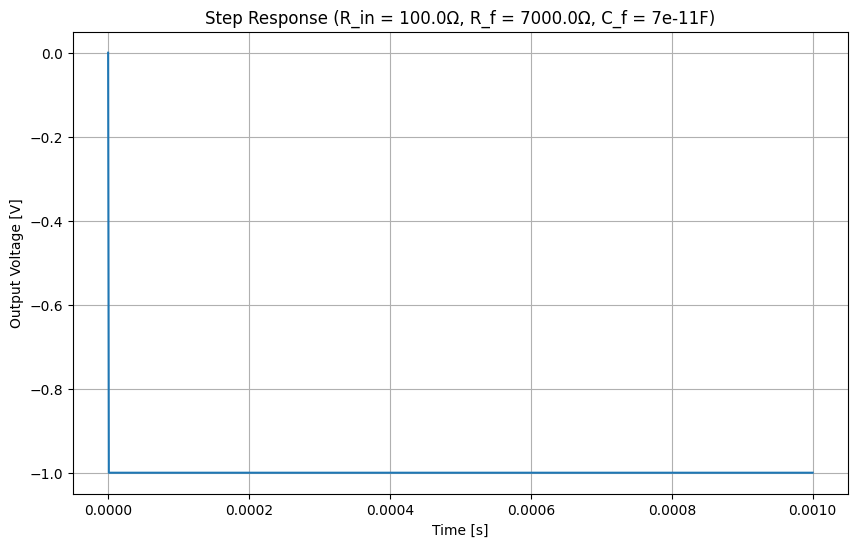

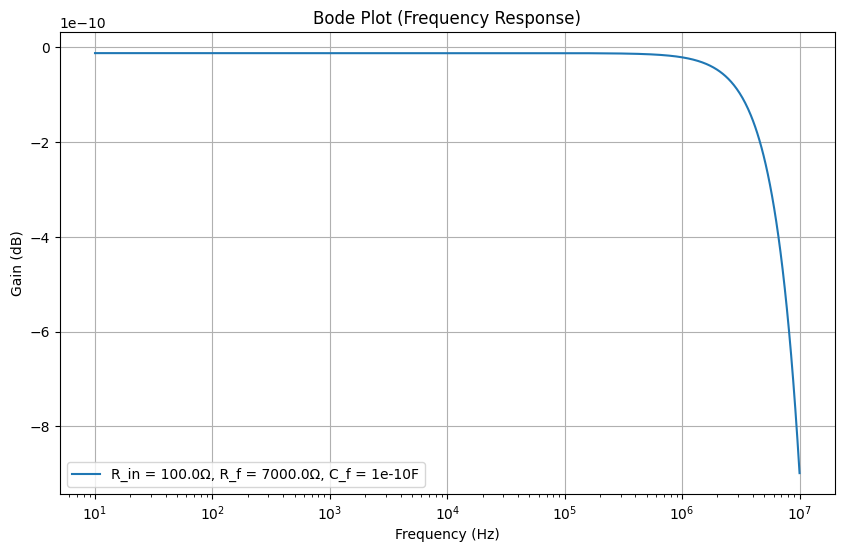

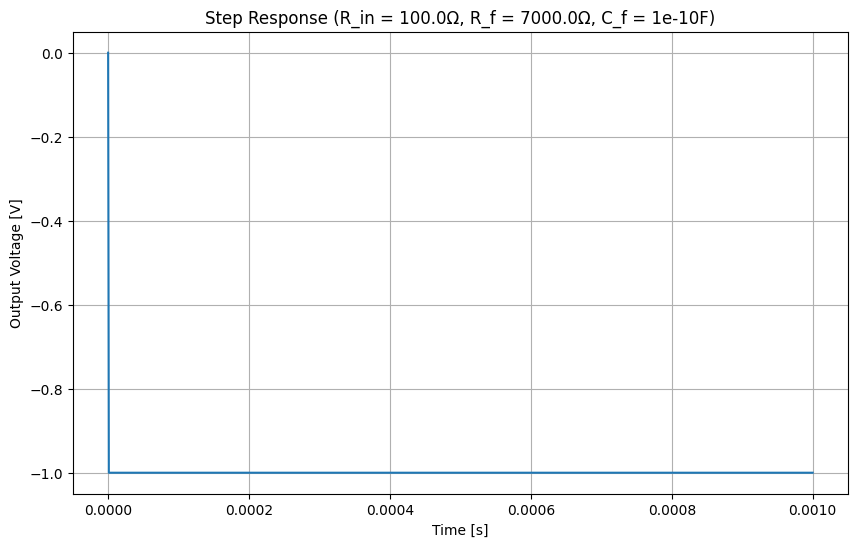

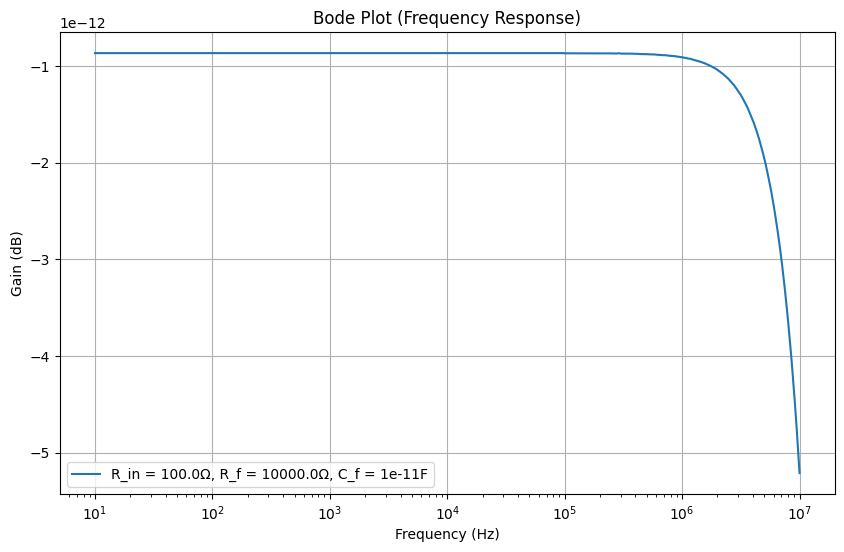

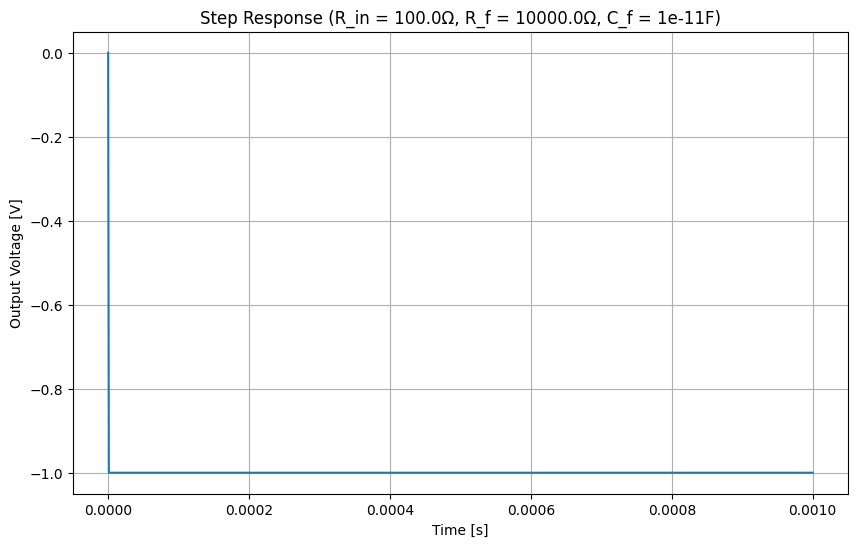

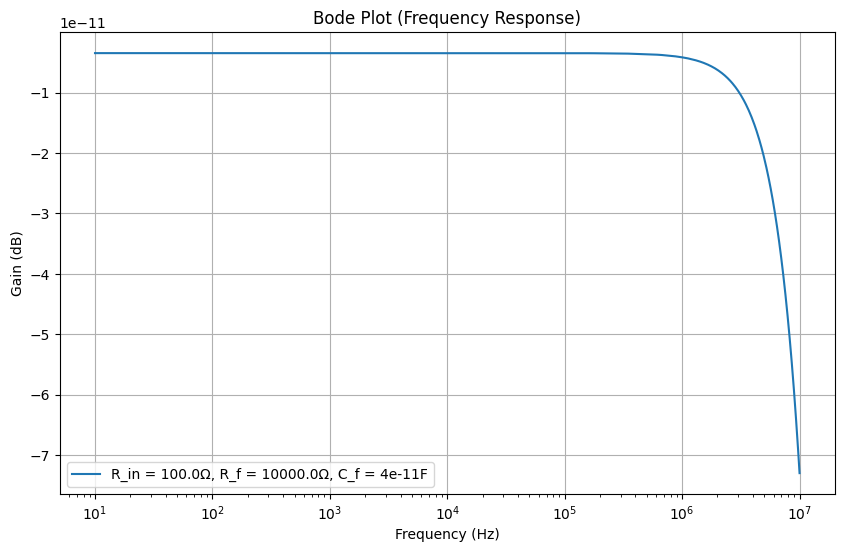

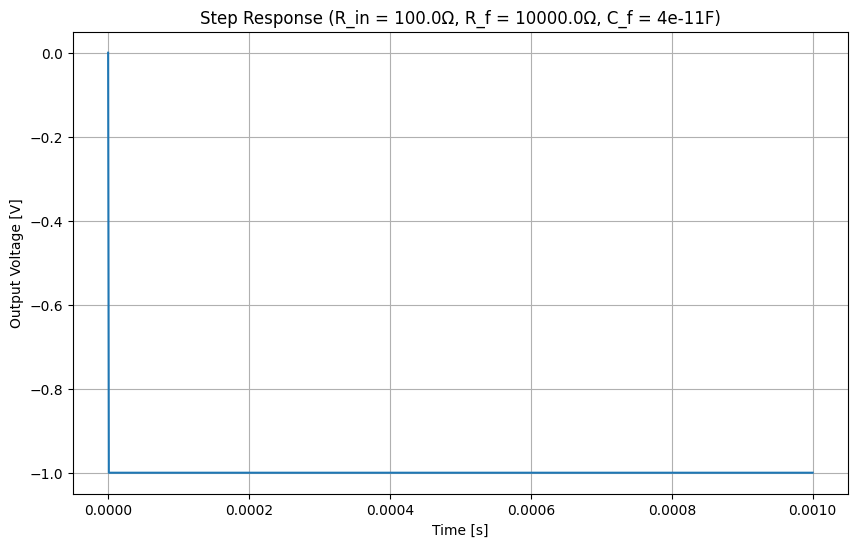

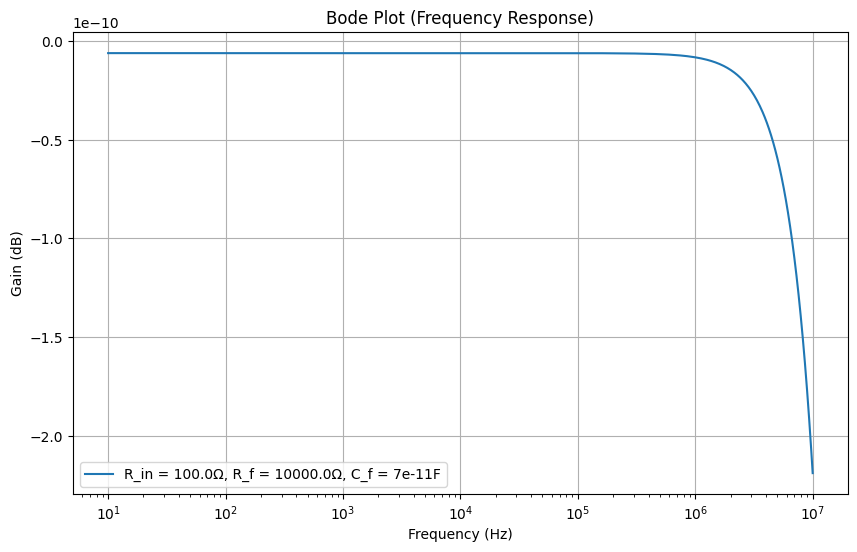

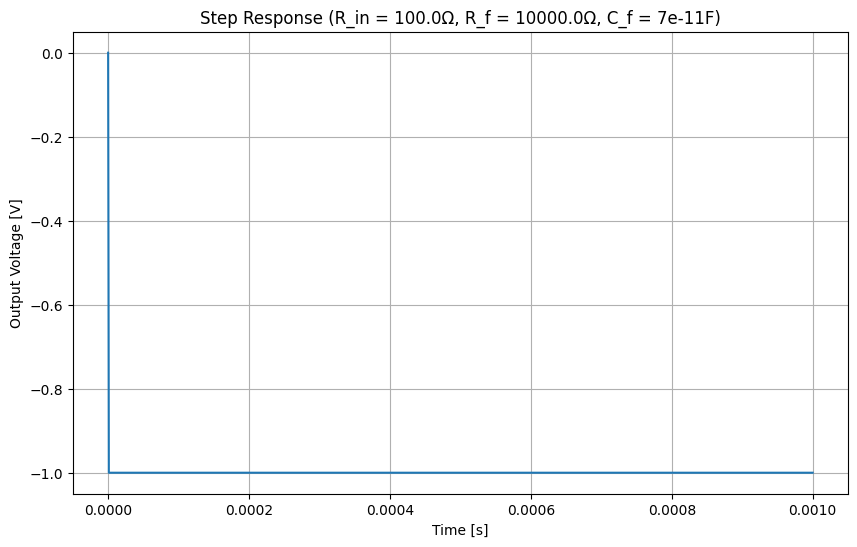

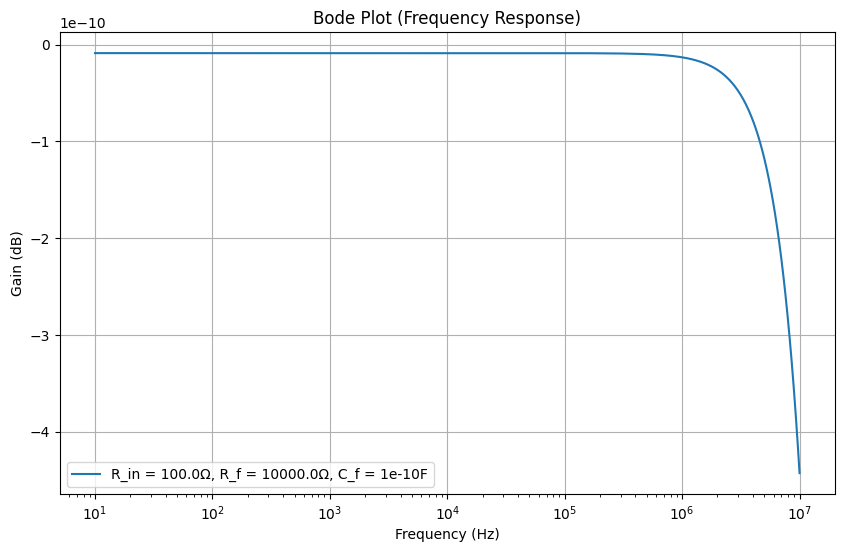

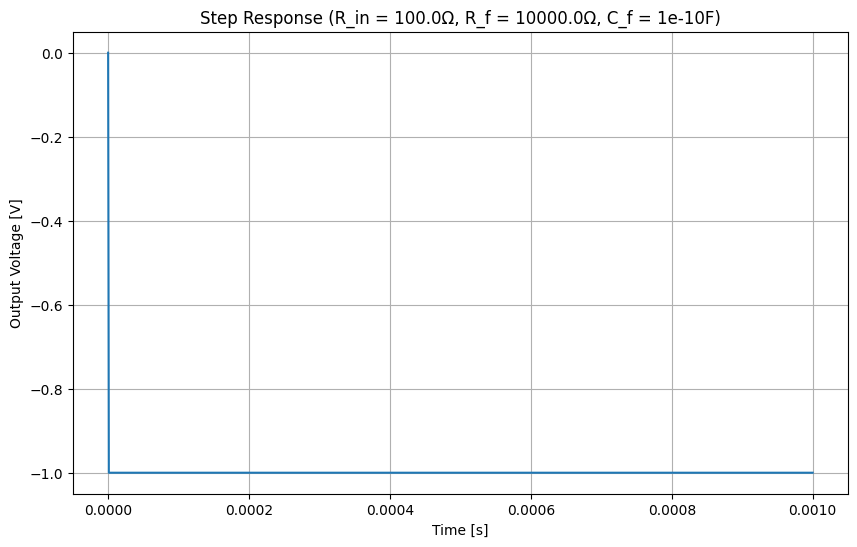

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Constants
V_dd = 6.0  # Supply voltage in Volts
I_bias = 1  # Fixed bias current (1 mA)
V_th = 0.7  # Threshold voltage of the MOSFET in Volts

# Define resistor ranges for optimization
R_in_range = np.linspace(1, 100, 4)  # Input resistance from 1Ω to 100Ω
R_f_range = np.linspace(1e3, 10e3, 4)  # Feedback resistance from 1Ω to 10kΩ
C_f_range = np.linspace(10e-12, 100e-12, 4)  # Feedback capacitor from 10pF to 100pF

# Simulating frequency response (Bode plot)
def bode_plot(R_in, R_f, C_f):
    # Transfer function: simplified model of the op-amp with feedback capacitor
    numerator = [0, -R_f]
    denominator = [R_in * C_f, R_f + R_in * C_f]
    
    # Frequency range (from 10 Hz to 10 MHz)
    frequencies = np.logspace(1, 7, 1000)
    w, mag, phase = signal.bode((numerator, denominator), frequencies)

    plt.figure(figsize=(10, 6))
    plt.semilogx(w, mag, label=f"R_in = {R_in}Ω, R_f = {R_f}Ω, C_f = {C_f}F")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Gain (dB)")
    plt.title("Bode Plot (Frequency Response)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Simulate step response
def step_response(R_in, R_f, C_f):
    # Step response simulation (simplified model)
    system = signal.TransferFunction([0, -R_f], [R_in * C_f, R_f + R_in * C_f])
    time = np.linspace(0, 1e-3, 1000)
    t, y = signal.step(system, T=time)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, y)
    plt.title(f"Step Response (R_in = {R_in}Ω, R_f = {R_f}Ω, C_f = {C_f}F)")
    plt.xlabel("Time [s]")
    plt.ylabel("Output Voltage [V]")
    plt.grid(True)
    plt.show()

# Loop through different values of R_in, R_f, and C_f
for R_in in R_in_range:
    for R_f in R_f_range:
        for C_f in C_f_range:
            # Bode plot (Frequency response)
            bode_plot(R_in, R_f, C_f)
            
            # Step response
            step_response(R_in, R_f, C_f)


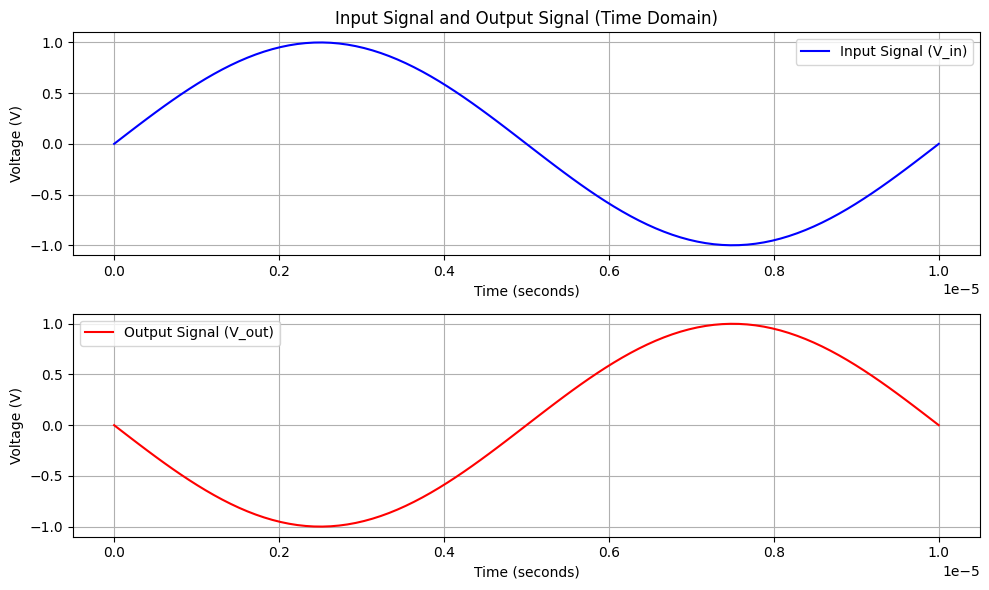

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Constants
V_dd = 6.0  # Supply voltage in Volts
I_bias = 1e-3  # Fixed bias current (1 mA)
V_th = 0.7  # Threshold voltage of the MOSFET in Volts

# Define resistor and capacitor values
R_in = 100  # Input resistance in Ohms (fixed)
R_f = 10e3  # Feedback resistance in Ohms (fixed)
C_f = 10e-12  # Feedback capacitor in Farads (fixed)

# Time settings for simulation
t_end = 10e-6  # 10 microseconds simulation time (one period of 10 MHz signal)
f_in = 10e6  # Input frequency (10 MHz)
t = np.linspace(0, t_end, int(t_end * f_in))  # Time array for 10 MHz signal

# Input signal: Sinusoidal signal with 10 MHz frequency
V_in = np.sin(2 * np.pi * f_in * t)  # Sinusoidal signal (10 MHz)

# Define transfer function: Inverting Op-Amp with feedback
numerator = [0, -R_f]  # Coefficients for output (inverting amplifier)
denominator = [R_in * C_f, R_f + R_in * C_f]  # Denominator of the transfer function

# Create the transfer function system
system = signal.TransferFunction(numerator, denominator)

# Simulate output signal (using lsim for the system response to the input)
t, y, _ = signal.lsim(system, V_in, t)

# Plotting the input and output signals
plt.figure(figsize=(10, 6))

# Plot Input Signal (Sinusoidal Signal)
plt.subplot(2, 1, 1)
plt.plot(t, V_in, label="Input Signal (V_in)", color="blue")
plt.title("Input Signal and Output Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()

# Plot Output Signal (System Response)
plt.subplot(2, 1, 2)
plt.plot(t, y, label="Output Signal (V_out)", color="red")
plt.xlabel("Time (seconds)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
